#TS01: Dataset exploration

In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy .stats import skew, kurtosis, zscore
import warnings
import datetime as dt

In [ ]:
# Load the dataset
df = pd.read_csv('/content/tesla.csv')
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [ ]:
# Standardize date format and convert to datetime, forcing invalid dates to NaT
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=False)

# Optionally, drop rows with NaT in 'Date' (if needed)
df = df.dropna(subset=['Date'])

# Now you can print or work with your cleaned DataFrame
print(df)

           Date        Open        High         Low       Close    Volume  \
0    2010-06-29   19.000000   25.000000   17.540001   23.889999  18766300   
1    2010-06-30   25.790001   30.420000   23.299999   23.830000  17187100   
2    2010-07-01   25.000000   25.920000   20.270000   21.959999   8218800   
3    2010-07-02   23.000000   23.100000   18.709999   19.200001   5139800   
4    2010-07-06   20.000000   20.000000   15.830000   16.110001   6866900   
...         ...         ...         ...         ...         ...       ...   
1687 2017-03-13  244.820007  246.850006  242.779999  246.169998   3010700   
1688 2017-03-14  246.110001  258.119995  246.020004  258.000000   7575500   
1689 2017-03-15  257.000000  261.000000  254.270004  255.729996   4816600   
1690 2017-03-16  262.399994  265.750000  259.059998  262.049988   7100400   
1691 2017-03-17  264.000000  265.329987  261.200012  261.500000   6475900   

       Adj Close  
0      23.889999  
1      23.830000  
2      21.959999  

In [ ]:
# Basic Exploration

# Check the top rows
print("Top rows of the dataset:")
print(df.head())

Top rows of the dataset:
        Date       Open   High        Low      Close    Volume  Adj Close
0 2010-06-29  19.000000  25.00  17.540001  23.889999  18766300  23.889999
1 2010-06-30  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2 2010-07-01  25.000000  25.92  20.270000  21.959999   8218800  21.959999
3 2010-07-02  23.000000  23.10  18.709999  19.200001   5139800  19.200001
4 2010-07-06  20.000000  20.00  15.830000  16.110001   6866900  16.110001


In [ ]:
# Dataset shape (rows, columns)
print("\nShape of the dataset:")
print(df.shape)


Shape of the dataset:
(1692, 7)


In [ ]:
# Column names
print("\nColumn names:")
print(df.columns)


Column names:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [ ]:
# Data types of each column
print("\nData types:")
print(df.dtypes)


Data types:
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object


In [ ]:
# Summary statistics (numeric columns)
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
                                Date         Open         High          Low  \
count                           1692  1692.000000  1692.000000  1692.000000   
mean   2013-11-06 02:53:37.021276416   132.441572   134.769698   129.996223   
min              2010-06-29 00:00:00    16.139999    16.629999    14.980000   
25%              2012-03-01 18:00:00    30.000000    30.650000    29.215000   
50%              2013-11-05 12:00:00   156.334999   162.370002   153.150002   
75%              2015-07-14 06:00:00   220.557495   224.099999   217.119999   
max              2017-03-17 00:00:00   287.670013   291.420013   280.399994   
std                              NaN    94.309923    95.694914    92.855227   

             Close        Volume    Adj Close  
count  1692.000000  1.692000e+03  1692.000000  
mean    132.428658  4.270741e+06   132.428658  
min      15.800000  1.185000e+05    15.800000  
25%      29.884999  1.194350e+06    29.884999  
50%     158.160004  3.18070

In [ ]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64


In [ ]:
#Deeper Insights

# Unique values in a specific column (example for 'Date')
print("\nUnique values in 'Date' column:")
print(df['Date'].unique())



Unique values in 'Date' column:
<DatetimeArray>
['2010-06-29 00:00:00', '2010-06-30 00:00:00', '2010-07-01 00:00:00',
 '2010-07-02 00:00:00', '2010-07-06 00:00:00', '2010-07-07 00:00:00',
 '2010-07-08 00:00:00', '2010-07-09 00:00:00', '2010-07-12 00:00:00',
 '2010-07-13 00:00:00',
 ...
 '2017-03-06 00:00:00', '2017-03-07 00:00:00', '2017-03-08 00:00:00',
 '2017-03-09 00:00:00', '2017-03-10 00:00:00', '2017-03-13 00:00:00',
 '2017-03-14 00:00:00', '2017-03-15 00:00:00', '2017-03-16 00:00:00',
 '2017-03-17 00:00:00']
Length: 1692, dtype: datetime64[ns]


In [ ]:
# Value counts for 'Volume' column (example)
print("\nValue counts for 'Volume' column:")
print(df['Volume'].value_counts().head())


Value counts for 'Volume' column:
Volume
986300     2
1714500    2
922500     2
729300     2
8998200    2
Name: count, dtype: int64


In [ ]:
# Correlation matrix
print("\nCorrelation matrix:")
print(df.corr())


Correlation matrix:
               Date      Open      High       Low     Close    Volume  \
Date       1.000000  0.891066  0.890877  0.891750  0.891257  0.313224   
Open       0.891066  1.000000  0.999623  0.999605  0.999233  0.407515   
High       0.890877  0.999623  1.000000  0.999521  0.999691  0.416466   
Low        0.891750  0.999605  0.999521  1.000000  0.999656  0.397615   
Close      0.891257  0.999233  0.999691  0.999656  1.000000  0.406907   
Volume     0.313224  0.407515  0.416466  0.397615  0.406907  1.000000   
Adj Close  0.891257  0.999233  0.999691  0.999656  1.000000  0.406907   

           Adj Close  
Date        0.891257  
Open        0.999233  
High        0.999691  
Low         0.999656  
Close       1.000000  
Volume      0.406907  
Adj Close   1.000000  


In [ ]:
# Sort by 'Date'
print("\nDataset sorted by 'Date' column:")
print(df.sort_values(by='Date'))


Dataset sorted by 'Date' column:
           Date        Open        High         Low       Close    Volume  \
0    2010-06-29   19.000000   25.000000   17.540001   23.889999  18766300   
1    2010-06-30   25.790001   30.420000   23.299999   23.830000  17187100   
2    2010-07-01   25.000000   25.920000   20.270000   21.959999   8218800   
3    2010-07-02   23.000000   23.100000   18.709999   19.200001   5139800   
4    2010-07-06   20.000000   20.000000   15.830000   16.110001   6866900   
...         ...         ...         ...         ...         ...       ...   
1687 2017-03-13  244.820007  246.850006  242.779999  246.169998   3010700   
1688 2017-03-14  246.110001  258.119995  246.020004  258.000000   7575500   
1689 2017-03-15  257.000000  261.000000  254.270004  255.729996   4816600   
1690 2017-03-16  262.399994  265.750000  259.059998  262.049988   7100400   
1691 2017-03-17  264.000000  265.329987  261.200012  261.500000   6475900   

       Adj Close  
0      23.889999  
1  

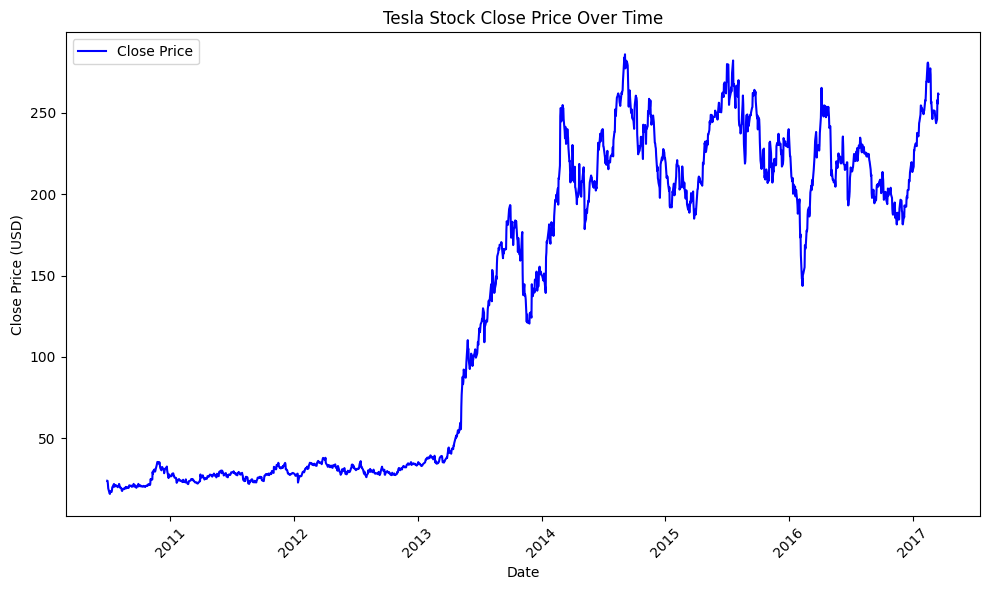

In [ ]:
# Visual Exploration

# Plotting the 'Close' price over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title("Tesla Stock Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Histogram for 'Volume' column

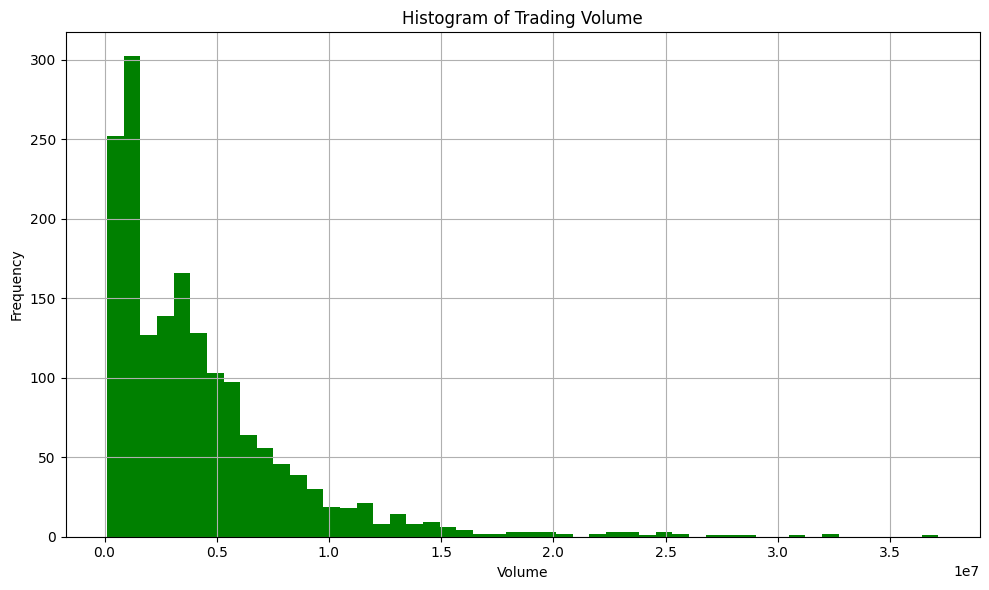

In [ ]:
# Histogram for 'Volume' column
plt.figure(figsize=(10, 6))
df['Volume'].hist(bins=50, color='green')
plt.title("Histogram of Trading Volume")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#TS02: Dataset validation

In [17]:
warnings.filterwarnings('ignore')

# Load the Tesla dataset
tesla_data = pd.read_csv('/content/tesla.csv')

In [18]:
# Check the column names to replace placeholders
print(tesla_data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [19]:
# Check the DataFrame structure and column names
print(tesla_data.columns)  # Ensure 'Date' is in the column names

# Strip leading and trailing whitespace from column names (if any)
tesla_data.columns = tesla_data.columns.str.strip()
print(tesla_data.columns)  # Print the cleaned column names

# Step 1: Convert the 'Date' column  to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=False)

# Optionally, drop rows with NaT in 'Date' (if needed)
df = df.dropna(subset=['Date'])

# Now you can print or work with your cleaned DataFrame
print(df)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')
           Date        Open        High         Low       Close    Volume  \
0    2010-06-29   19.000000   25.000000   17.540001   23.889999  18766300   
1    2010-06-30   25.790001   30.420000   23.299999   23.830000  17187100   
2    2010-07-01   25.000000   25.920000   20.270000   21.959999   8218800   
3    2010-07-02   23.000000   23.100000   18.709999   19.200001   5139800   
4    2010-07-06   20.000000   20.000000   15.830000   16.110001   6866900   
...         ...         ...         ...         ...         ...       ...   
1687 2017-03-13  244.820007  246.850006  242.779999  246.169998   3010700   
1688 2017-03-14  246.110001  258.119995  246.020004  258.000000   7575500   
1689 2017-03-15  257.000000  261.000000  254.270004  255.729996   4816600   
1690 2017-03-16  262.399994  265.750000  259.059998  262

In [20]:
# Step 2: Check for missing data
missing_data = tesla_data.isnull().sum()
print("\nMissing data:")
print(missing_data)


Missing data:
Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64


In [21]:
# Step 3: Outlier Detection using Z-score (on numeric columns)
# Select numeric columns for analysis (skip the 'Date' column)
numeric_columns = tesla_data.select_dtypes(include=[np.number]).columns

# Calculate Z-scores
z_scores = np.abs((tesla_data[numeric_columns] - tesla_data[numeric_columns].mean()) / tesla_data[numeric_columns].std())

# Find outliers where Z-score > 3
outliers = (z_scores > 3).sum()
print("\nOutliers per column:")
print(outliers)


Outliers per column:
Open          0
High          0
Low           0
Close         0
Volume       34
Adj Close     0
dtype: int64


In [22]:
# Step 4: Calculate Skewness and Kurtosis for distribution analysis
skewness = tesla_data[numeric_columns].apply(lambda x: skew(x.dropna()))
kurtosis_vals = tesla_data[numeric_columns].apply(lambda x: kurtosis(x.dropna()))

print("\nSkewness:")
print(skewness)

print("\nKurtosis:")
print(kurtosis_vals)


Skewness:
Open        -0.027382
High        -0.034205
Low         -0.021037
Close       -0.027977
Volume       2.538785
Adj Close   -0.027977
dtype: float64

Kurtosis:
Open        -1.753629
High        -1.757042
Low         -1.750665
Close       -1.753760
Volume       9.749834
Adj Close   -1.753760
dtype: float64


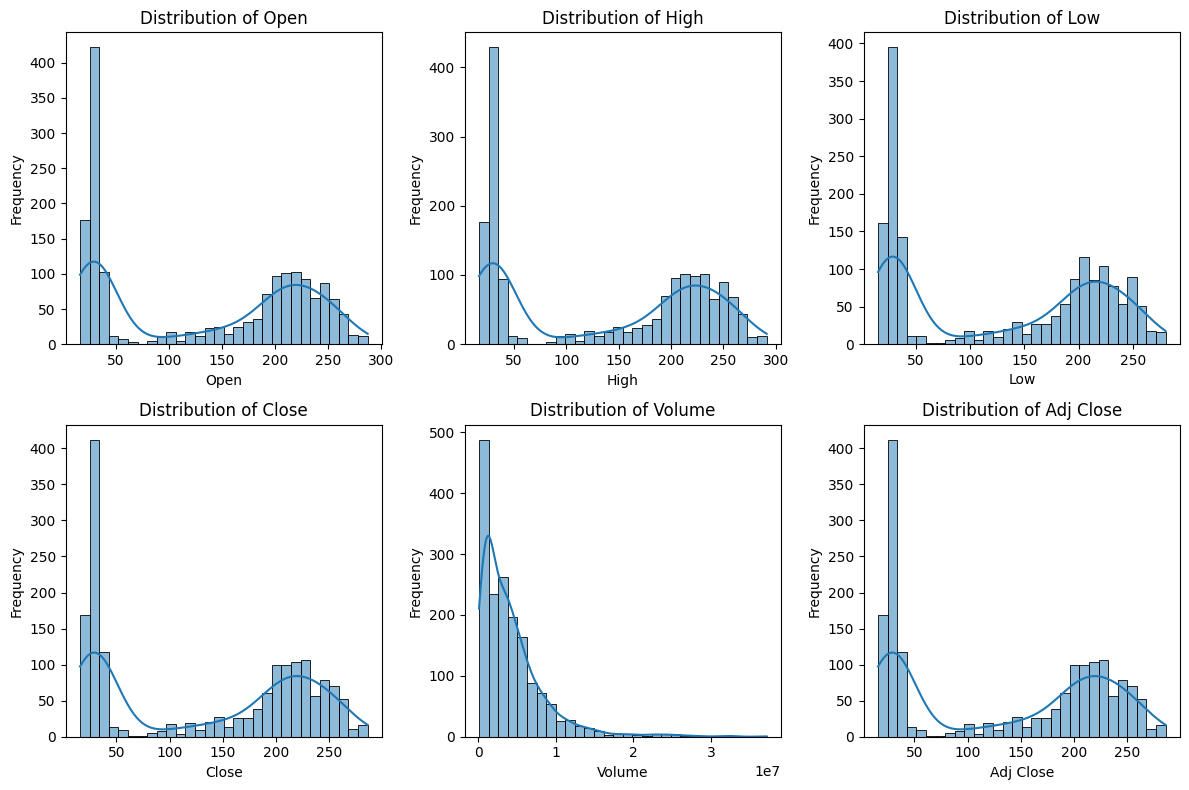

In [23]:
# Step 5: Visualize the distribution of selected numeric columns (histograms)
plt.figure(figsize=(12, 8))

# Loop through selected numeric columns to create histograms
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i+1)  # Adjust the layout as per the number of columns
    sns.histplot(tesla_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

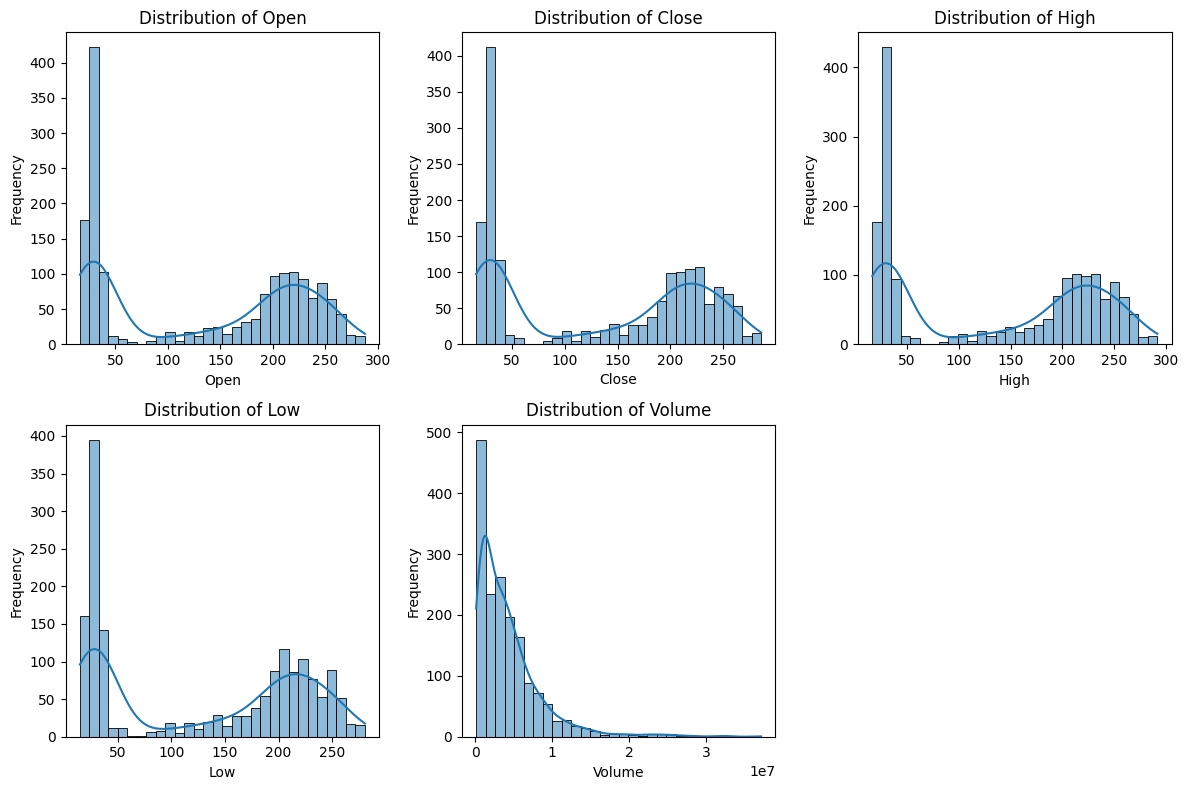

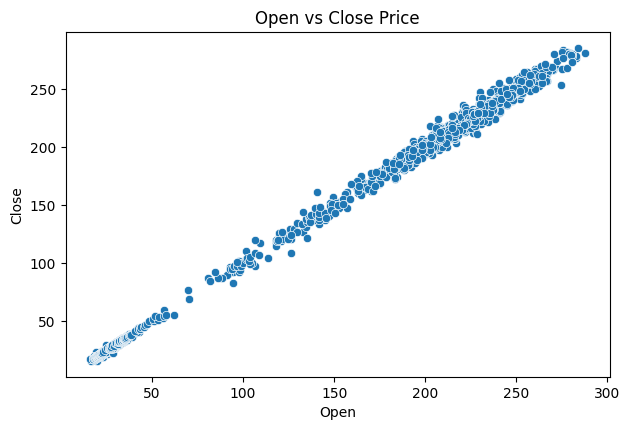

In [24]:
# Step 5: Visualize the distribution of selected numeric columns (histograms)
plt.figure(figsize=(12, 8))

# Loop through selected numeric columns to create histograms
numeric_columns = ['Open', 'Close', 'High', 'Low', 'Volume']  # Replace with your actual numeric columns
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i+1)  # Adjust the layout as per the number of columns
    sns.histplot(tesla_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplots to prevent overlap
plt.show()

# Step 6: Create scatterplots to visualize relationships (e.g., Close vs Open)
plt.figure(figsize=(12, 8))

# Scatterplot for Open vs Close price
plt.subplot(2, 2, 1)  # Adjust this for more subplots if necessary
sns.scatterplot(x=tesla_data['Open'], y=tesla_data['Close'])
plt.title('Open vs Close Price')
plt.xlabel('Open')
plt.ylabel('Close')

# Add more scatterplots if needed for other relationships (e.g., High vs Low, Volume vs Close, etc.)
# plt.subplot(2, 2, 2)
# sns.scatterplot(x=tesla_data['High'], y=tesla_data['Low'])
# plt.title('High vs Low Price')
# plt.xlabel('High')
# plt.ylabel('Low')

plt.tight_layout()  # Adjust the layout of subplots
plt.show()

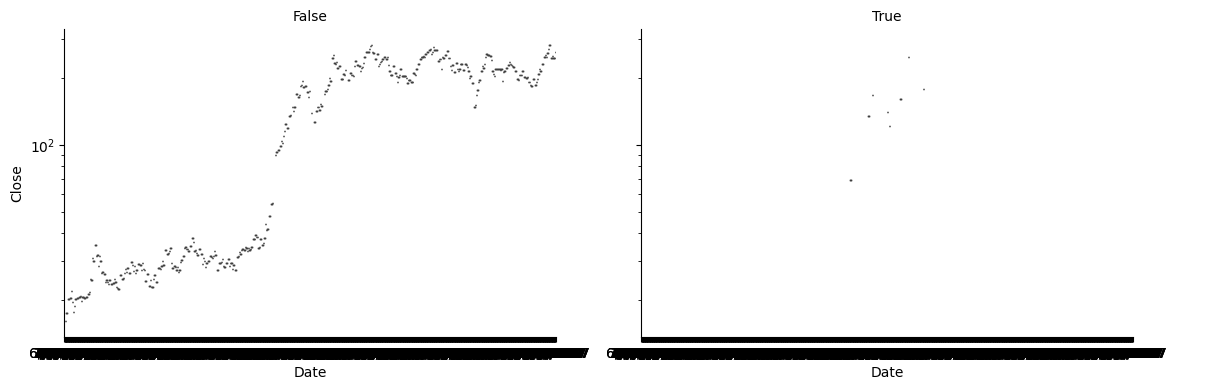

In [25]:
# Step 7: Boxplot for outliers detection (for numeric columns)
# Adding a column for outlier flag based on Z-score
tesla_data['is_outlier'] = (z_scores > 3).any(axis=1)

# Boxplot based on outlier detection
g = sns.catplot(
    data=tesla_data,
    x="Date",  # Replace with relevant column name for x-axis, 'Date' can be used
    y="Close",  # Replace with the column you're analyzing (e.g., 'Close' for stock prices)
    kind="box",
    col="is_outlier",
    col_wrap=2,
    height=4,
    aspect=1.5,
)

g.set_titles("{col_name}")
g.set_axis_labels("Date", "Close")
g.set(yscale="log")  # Optional: scale adjustment if necessary
g.tight_layout()
plt.show()

In [26]:
# Step 8: Filter the rows where outlier scores are greater than 3 or less than -3
tesla_data_outliers = tesla_data[(z_scores > 3).any(axis=1)]

# Preview the rows with outliers
print("\nRows with outliers:")
print(tesla_data_outliers.head())


Rows with outliers:
          Date       Open       High        Low      Close    Volume  \
0    6/29/2010  19.000000  25.000000  17.540001  23.889999  18766300   
1    6/30/2010  25.790001  30.420000  23.299999  23.830000  17187100   
720   5/9/2013  70.120003  75.769997  63.689999  69.400002  28605000   
721  5/10/2013  69.650002  81.000000  69.250000  76.760002  25082600   
722  5/13/2013  80.989998  88.000000  79.150002  87.800003  22416900   

     Adj Close  is_outlier  
0    23.889999        True  
1    23.830000        True  
720  69.400002        True  
721  76.760002        True  
722  87.800003        True  


#TS03: EDA

In [ ]:
! pip install yfinance    # install yfinance
import yfinance as yf     # import yfinance
import matplotlib.pyplot as plt    # import matplotlib
import pandas as pd       #e import pandas
import seaborn as sns     # import seaborn
from statsmodels.graphics import tsaplots    # import tsa plots["stats models"]

In [ ]:
def download(stock):
    """
    download the stock historical data

    parameters
    -----------
    stock:str
      stock symbol.

    Returns
    ---------
    DataFrame
        downloaded stock historical data.
    """
    import yfinance as yf
    df = yf.download(
        [stock],
        start="2017-01-01",
        end="2022-01-01",
        group_by="ticker",
        progress=False, # Changed false to False
    )

    df.round(4)
    df.insert(loc=0, column="company", value=stock)
    return df


# Download apple dataframe
df_AAPL = download("AAPL")
# Download Amazon dataframe
df_AMZN = download("AMZN")  # Removed extra parentheses
# Download Google dataframe
df_GOOGL = download("GOOGL")
# Download Microsoft dataframe
df_MSFT = download("MSFT")
# Download Tesla dataframe
df_TSLA = download("TSLA")
# Download Facebook dataframe
df_FB = download("META")

stock_list = {
    "TSLA": df_TSLA,
}

In [ ]:
print(df_AAPL)

Ticker     company        AAPL                                      \
Price                     Open        High         Low       Close   
Date                                                                 
2017-01-03    AAPL   28.950001   29.082500   28.690001   29.037500   
2017-01-04    AAPL   28.962500   29.127501   28.937500   29.004999   
2017-01-05    AAPL   28.980000   29.215000   28.952499   29.152500   
2017-01-06    AAPL   29.195000   29.540001   29.117500   29.477501   
2017-01-09    AAPL   29.487499   29.857500   29.485001   29.747499   
...            ...         ...         ...         ...         ...   
2021-12-27    AAPL  177.089996  180.419998  177.070007  180.330002   
2021-12-28    AAPL  180.160004  181.330002  178.529999  179.289993   
2021-12-29    AAPL  179.330002  180.630005  178.139999  179.380005   
2021-12-30    AAPL  179.470001  180.570007  178.089996  178.199997   
2021-12-31    AAPL  178.089996  179.229996  177.259995  177.570007   

Ticker             

In [ ]:
print(df_TSLA)

Ticker     company        TSLA                                      \
Price                     Open        High         Low       Close   
Date                                                                 
2017-01-03    TSLA   14.324000   14.688667   14.064000   14.466000   
2017-01-04    TSLA   14.316667   15.200000   14.287333   15.132667   
2017-01-05    TSLA   15.094667   15.165333   14.796667   15.116667   
2017-01-06    TSLA   15.128667   15.354000   15.030000   15.267333   
2017-01-09    TSLA   15.264667   15.461333   15.200000   15.418667   
...            ...         ...         ...         ...         ...   
2021-12-27    TSLA  357.890015  372.333344  356.906677  364.646667   
2021-12-28    TSLA  369.829987  373.000000  359.473328  362.823334   
2021-12-29    TSLA  366.213318  368.000000  354.713318  362.063324   
2021-12-30    TSLA  353.776672  365.183319  351.049988  356.779999   
2021-12-31    TSLA  357.813324  360.666656  351.529999  352.260010   

Ticker             

In [ ]:
def info(stock,df):
    """
    print the summary information of each stock

    parameters
    ----------
    stock:str
      stock company.
    df:DataFrame
      stock dataframe.

    Returns
    --------
    None.
    """

    print(f'{stock}\'s Historical Data: \n\n {df} \n\n')
    print(f'{stock}\'s column information:\n')
    print(df.info(),'\n\n')
    print(f'{stock}\'s stock summary:\n\n{df.describe().round(4)}') #added () after describe
    print('-'*75)
    print()
 # Assuming you meant df_AAPL here. If not replace all instances of df_APPL with actual variable name.
print(info('tesla',df_TSLA))


tesla's Historical Data: 

 Ticker     company        TSLA                                      \
Price                     Open        High         Low       Close   
Date                                                                 
2017-01-03    TSLA   14.324000   14.688667   14.064000   14.466000   
2017-01-04    TSLA   14.316667   15.200000   14.287333   15.132667   
2017-01-05    TSLA   15.094667   15.165333   14.796667   15.116667   
2017-01-06    TSLA   15.128667   15.354000   15.030000   15.267333   
2017-01-09    TSLA   15.264667   15.461333   15.200000   15.418667   
...            ...         ...         ...         ...         ...   
2021-12-27    TSLA  357.890015  372.333344  356.906677  364.646667   
2021-12-28    TSLA  369.829987  373.000000  359.473328  362.823334   
2021-12-29    TSLA  366.213318  368.000000  354.713318  362.063324   
2021-12-30    TSLA  353.776672  365.183319  351.049988  356.779999   
2021-12-31    TSLA  357.813324  360.666656  351.529999  352.26

In [ ]:
print(df_TSLA.columns)

MultiIndex([('company',          ''),
            (   'TSLA',      'Open'),
            (   'TSLA',      'High'),
            (   'TSLA',       'Low'),
            (   'TSLA',     'Close'),
            (   'TSLA', 'Adj Close'),
            (   'TSLA',    'Volume')],
           names=['Ticker', 'Price'])


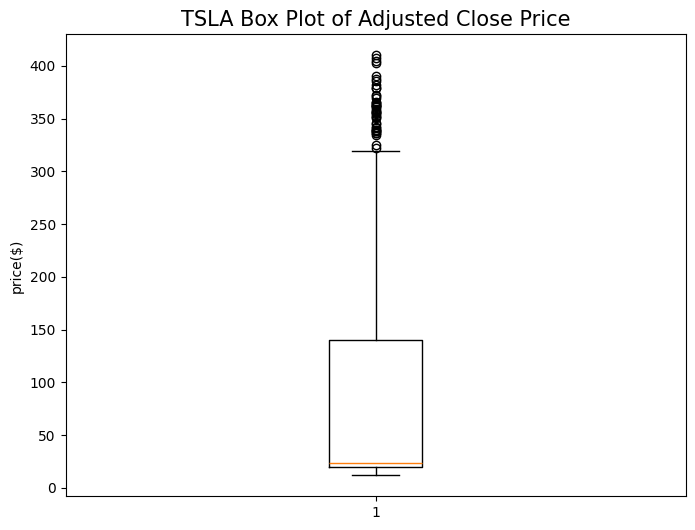

None 



In [ ]:
def boxplot(stock,company):
   """
   plot the box plot to the adjusted close price

   parameters
   -----------
   stock:DataFrame
     stock dataframe
   company:str
      company name.

   Returns
   --------
   None.
   """
   plt.figure(figsize=(8,6))
   plt.boxplot(stock[(company, 'Adj Close')])  # Access using MultiIndex
   plt.ylabel('price($)')
   plt.title(f'{company} Box Plot of Adjusted Close Price',fontsize=15)
   plt.show()

for company,stock in stock_list.items():
    print(boxplot(stock,company),'\n')
    plt.show()

<Figure size 640x480 with 0 Axes>

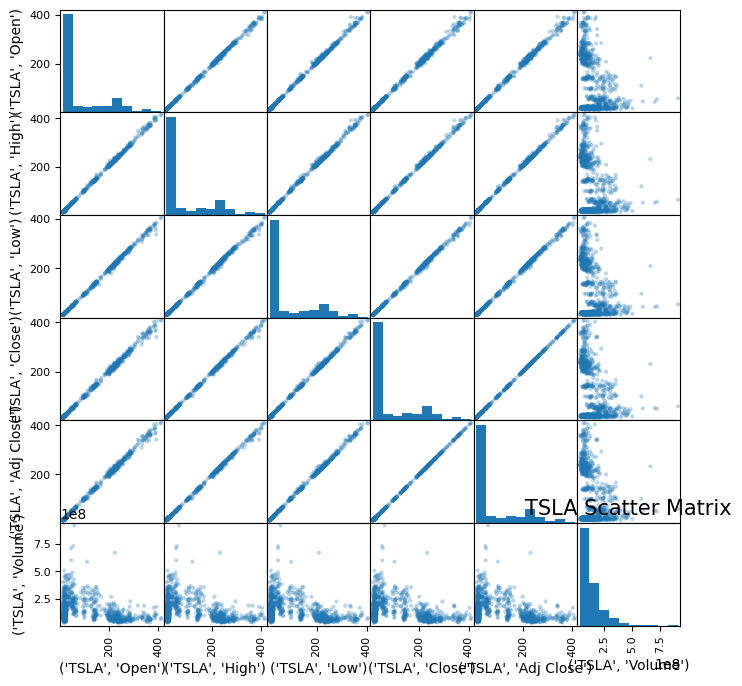

None 



In [ ]:
def scatter_matrix(stock, company):
    """
    Plot the scatter matrix.

    Parameters
    ----------
    stock: DataFrame
      Stock's DataFrame.
    company: str
      Company name.

    Returns
    -------
    None.
    """
    pd.plotting.scatter_matrix(stock,figsize=(8,8),alpha=0.3)
    plt.title(f'{company} Scatter Matrix',fontsize=15)
    plt.show()

for company,stock in stock_list.items():
   plt.suptitle(f'pairwise scatter plot of{company}',x=0.5,y=0.92)
   plt.show()

   for company,stock in stock_list.items():
      print(scatter_matrix(stock,company),'\n')
      plt.show()

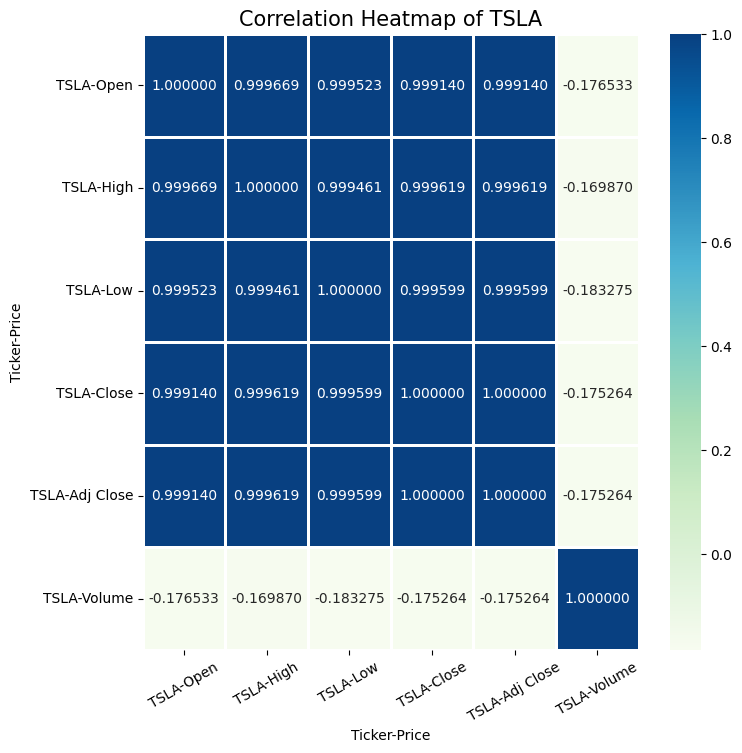

None 



In [ ]:
def heatmap(stock, company):
    """
    Plot the correlation heatmap.

    Parameters
    ----------
    stock: DataFrame
      Stock's DataFrame.
    company: str
      Company name.

    Returns
    -------
    None.
    """
    plt.figure(figsize=(8,8))
    # Changed 'Company' to 'company' to match the actual column name
    sns.heatmap(stock.drop(columns=['company']).corr(), cmap='GnBu', annot=True, linewidths = 1, fmt='f').set_title(f'Correlation Heatmap of {company}', fontsize=15)
    plt.xticks(rotation=30, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.show()

for company,stock in stock_list.items():
    print(heatmap(stock,company),'\n')
    plt.show()


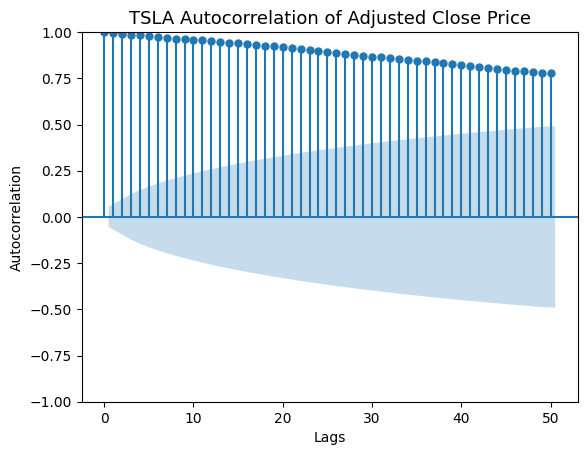

None 



In [ ]:
def autocorrelation(stock, company):
    """
    Plot the autocorrelation of stocks based on adjusted close price.

    Parameters
    ----------
    stock: DataFrame
      Stock's DataFrame.
    company: str
      Company name.

    Returns
    -------
    None
    """
    tsaplots.plot_acf(stock[(company, 'Adj Close')],lags=50)
    plt.title(f'{company} Autocorrelation of Adjusted Close Price', fontsize=13)
    plt.xlabel('Lags', fontsize=10)
    plt.ylabel('Autocorrelation', fontsize=10)
    plt.show()

for company,stock in stock_list.items():
    print(autocorrelation(stock,company),'\n')
    plt.show()

In [ ]:
# load the dataset
df = pd.read_csv('/content/tesla.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [ ]:
# load the dataset
df = pd.read_csv('/content/tesla.csv')
df.head()
df.info()

# check missing values
print(df.isnull().sum())
# drop nan rows
df = df.dropna()
#check missing values
print(df.isnull().sum())
# drop nan rows
df = df.dropna()

# Infer datetime format and handle errors
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df.info()

# check for duplicates
df.drop_duplicates(keep=False, inplace=True)

# rename the columns
df.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume', 'Name': 'name'}, inplace=True)  # Changed 'Date' to 'date'

# remove irrelevant columns
df.drop([ 'high', 'low', 'volume'], axis=1, inplace=True)
# Handle Outliers
q1 = df['close'].quantile(0.25)
q3 = df['close'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['close'] >= lower_bound) & (df['close'] <= upper_bound)]
# standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['open', 'close']] = scaler.fit_transform(df[['open', 'close']])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB
Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64
Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1021 non-null   dat

In [ ]:
df.columns

Index(['date', 'open', 'close', 'Adj Close'], dtype='object')

In [ ]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

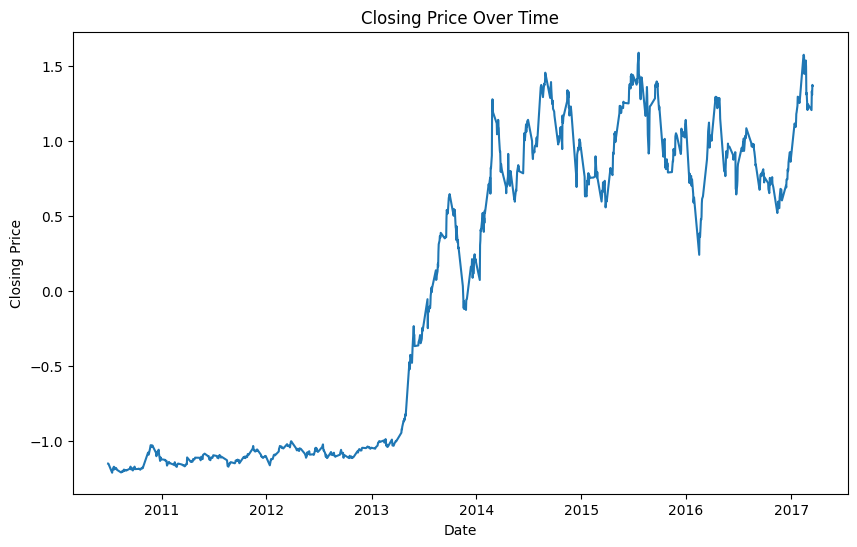

In [ ]:
# line chart of closing price over a time
plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='close', data=df)
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

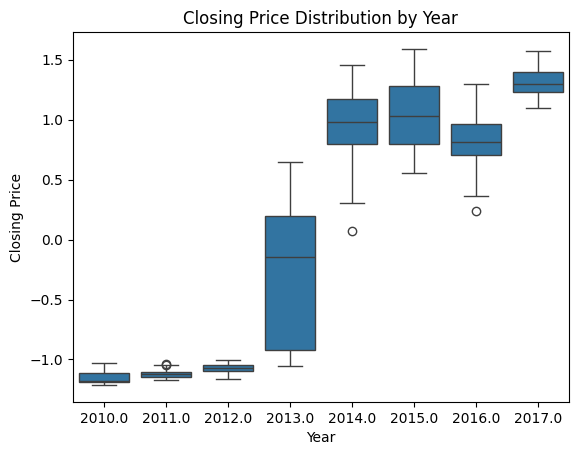

In [ ]:
df['year'] = df['date'].dt.year
sns.boxplot(x='year', y='close', data=df)
plt.title('Closing Price Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.show()

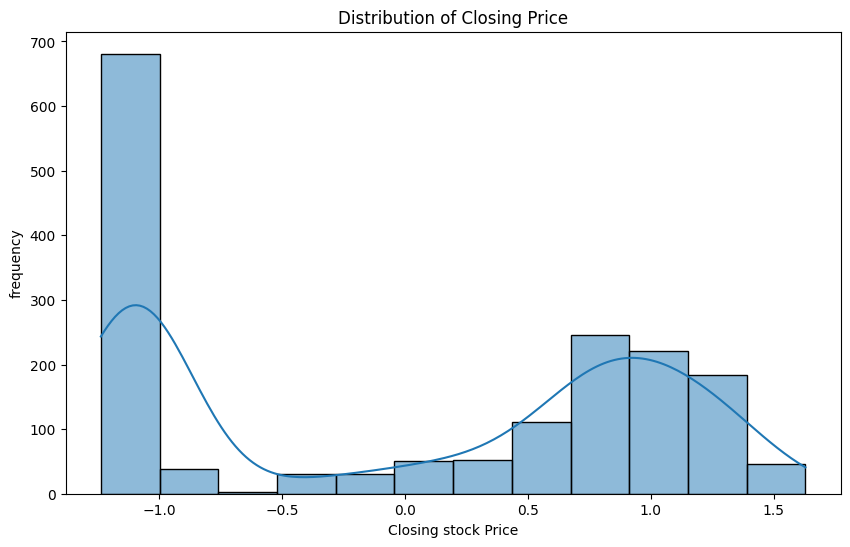

In [ ]:
# distributing the stock price
plt.figure(figsize=(10,6))
sns.histplot(df['close'], kde=True)
plt.title('Distribution of Closing Price')
plt.xlabel('Closing stock Price')
plt.ylabel('frequency')
plt.show()

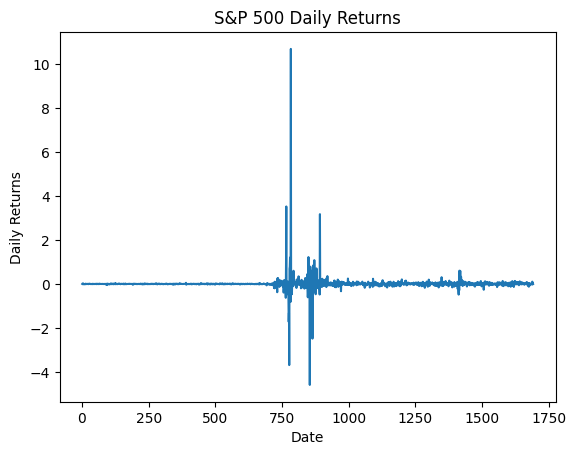

In [ ]:
daily_returns = df['close'].pct_change()
# create line chart for daily returns
plt.plot(daily_returns.index,daily_returns.values)
plt.title('S&P 500 Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.show()

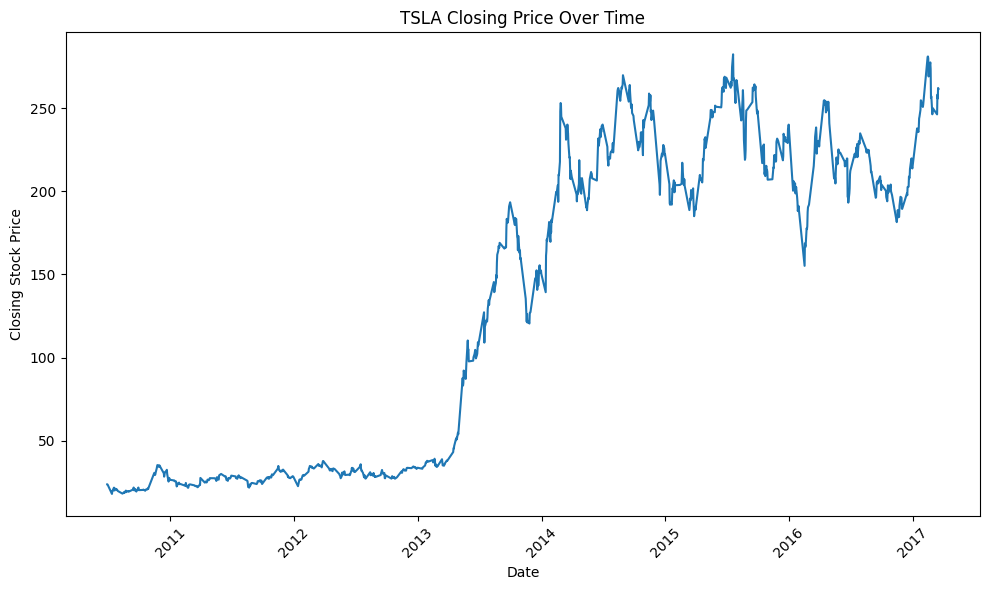

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# Load the dataset
df = pd.read_csv('/content/tesla.csv')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Create the line chart (No filtering is needed as all rows have 'TSLA' in the 'Name' column)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=df)  # Directly use the original DataFrame
plt.title('TSLA Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

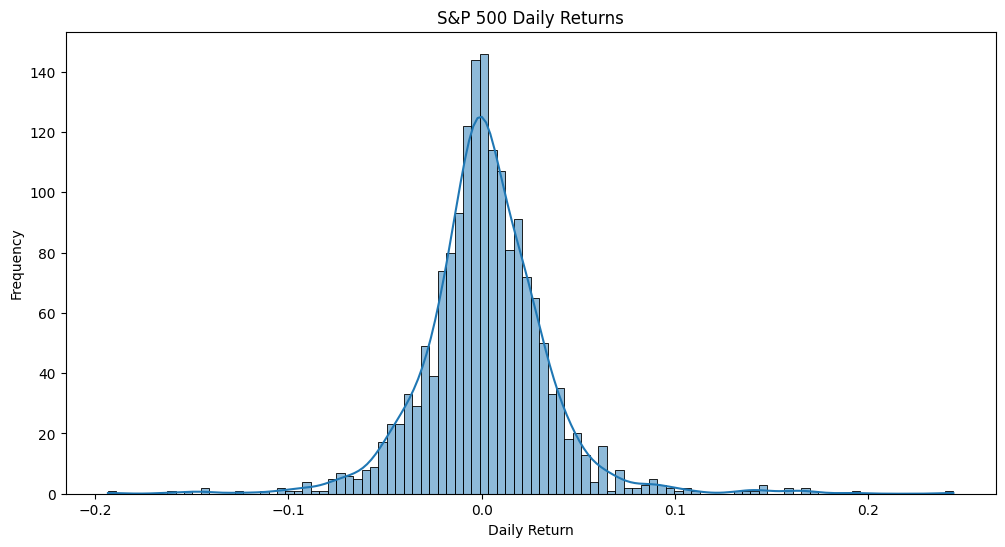

In [ ]:
# Create a histogram of the daily returns
plt.figure(figsize=(12,6))
# Changed 'Close' to 'Close' to match the actual column name
sns.histplot(df['Close'].pct_change().dropna(), bins=100, kde=True) # Changed 'close' to 'Close'
plt.title('S&P 500 Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

# TS04 - Unit Testing for TS01

In [ ]:
import unittest
import pandas as pd
import numpy as np

class TestDatasetExploration(unittest.TestCase):
  @classmethod
  def setUp(cls):
    cls.df = pd.read_csv('/content/tesla.csv')
    cls.df["Date"] = pd.to_datetime(cls.df["Date"])

  def test_dataset_loading(self):
    self.assertFalse(self.df.empty, "Dataset should not be empty")

  def test_dateset_shape(self):
    expected_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
    self.assertListEqual(list(self.df.columns), expected_columns, "Columns should match")

  def test_date_column_type(self):
    self.assertTrue(np.issubdtype(self.df["Date"].dtype, np.datetime64), "Date column should be of datetime64 type")

  def test_missing_values(self):
    self.assertEqual(self.df.isnull().sum().sum(), 0, "There should be no missing values in the dataset")

  def test_correlation_matrix(self):
    corr_matrix = self.df.corr()
    self.assertIsNotNone(corr_matrix, "Correlation matrix should not be None")

In [ ]:
unittest.main(argv=[''], verbosity=2, exit=False)

test_correlation_matrix (__main__.TestDatasetExploration) ... ok
test_dataset_loading (__main__.TestDatasetExploration) ... ok
test_date_column_type (__main__.TestDatasetExploration) ... ok
test_dateset_shape (__main__.TestDatasetExploration) ... ok
test_missing_values (__main__.TestDatasetExploration) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.556s

OK


# TS05 - Unit Testing for TS02

In [ ]:
import unittest
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

class TestDatasetValidation(unittest.TestCase):
  @classmethod
  def setUp(cls):
    cls.df = pd.read_csv('/content/tesla.csv')
    cls.df["Date"] = pd.to_datetime(cls.df["Date"])

  def test_dataset_loading(self):
    self.assertFalse(self.df.empty, "Dataset should not be empty")

  def test_date_column_exists(self):
    self.assertIn("Date", self.df.columns, "Date column should exist")

  def test_missing_values(self):
    self.assertEqual(self.df.isnull().sum().sum(), 0, "There should be no missing values in the dataset")

  def test_outliers_detection(self):
    numeric_columns = self.df.select_dtypes(include=[np.number]).columns
    z_scores = np.abs((self.df[numeric_columns] - self.df[numeric_columns].mean()) / self.df[numeric_columns].std())
    outliers = (z_scores > 3).sum().sum()
    self.assertGreaterEqual(outliers, 0, "There should be no outliers in the dataset")

  def test_skewness_and_kurtosis(self):
    numeric_columns = self.df.select_dtypes(include=[np.number]).columns
    skewness = self.df[numeric_columns].apply(lambda x: skew(x.dropna()))
    kurtosis_value = self.df[numeric_columns].apply(lambda x: kurtosis(x.dropna()))

    self.assertTrue(not skewness.isnull().any(), "Skewness values should not be null")
    self.assertTrue(not kurtosis_value.isnull().any(), "Kurtosis values should not be null")

  def test_outlier_flag(self):
    numeric_columns = self.df.select_dtypes(include=[np.number]).columns
    z_scores = np.abs((self.df[numeric_columns] - self.df[numeric_columns].mean()) / self.df[numeric_columns].std())

    self.df['is_outlier'] = (z_scores > 3).any(axis=1)
    self.assertIn('is_outlier', self.df.columns, "Outlier flag column should exist")
    self.assertTrue(self.df['is_outlier'].dtype == bool, "Outlier flag column should only contain 0s and 1s")

In [ ]:
unittest.main(argv=[''], verbosity=2, exit=False)

test_correlation_matrix (__main__.TestDatasetExploration) ... ok
test_dataset_loading (__main__.TestDatasetExploration) ... ok
test_date_column_type (__main__.TestDatasetExploration) ... ok
test_dateset_shape (__main__.TestDatasetExploration) ... ok
test_missing_values (__main__.TestDatasetExploration) ... ok
test_dataset_loading (__main__.TestDatasetValidation) ... ok
test_date_column_exists (__main__.TestDatasetValidation) ... ok
test_missing_values (__main__.TestDatasetValidation) ... ok
test_outlier_flag (__main__.TestDatasetValidation) ... ok
test_outliers_detection (__main__.TestDatasetValidation) ... ok
test_skewness_and_kurtosis (__main__.TestDatasetValidation) ... ok

----------------------------------------------------------------------
Ran 11 tests in 0.510s

OK


#TS06: ENCODING

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/tesla.csv',usecols=['Date','Open','Close','High','Low','Volume'])
df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1692 non-null   object 
 1   Open    1692 non-null   float64
 2   High    1692 non-null   float64
 3   Low     1692 non-null   float64
 4   Close   1692 non-null   float64
 5   Volume  1692 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 79.4+ KB


In [ ]:
# checking number of unique categories in each column
for col in df.columns:
    print(col,":", len(df[col].unique()),' labels')

Date : 1692  labels
Open : 1464  labels
High : 1470  labels
Low : 1468  labels
Close : 1528  labels
Volume : 1676  labels


ONE HOT ENCODING

In [ ]:
# using pandas
df = pd.get_dummies(df,drop_first=True)
df.shape

(1692, 1696)

In [ ]:
df.head(4)

,Open,High,Low,Close,Volume,Date_1/10/2012,Date_1/10/2013,Date_1/10/2014,Date_1/10/2017,Date_1/11/2011,...,Date_9/8/2011,Date_9/8/2014,Date_9/8/2015,Date_9/8/2016,Date_9/9/2010,Date_9/9/2011,Date_9/9/2013,Date_9/9/2014,Date_9/9/2015,Date_9/9/2016
0,19.000000,25.00,17.540001,23.889999,18766300,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,25.790001,30.42,23.299999,23.830000,17187100,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,25.000000,25.92,20.270000,21.959999,8218800,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,23.000000,23.10,18.709999,19.200001,5139800,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Define a threshold for the 'Low' column
threshold = df['Low'].median()

# Create a binary column: 1 if 'Low' > threshold, else 0
df['Low_Flag'] = (df['Low'] > threshold).astype(int)


In [ ]:
# using sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [ ]:
# taking the top 10 most frequent categories for the variable High
df.High.value_counts().sort_index(ascending=False).head(20)

,count
High,
291.420013,1
288.000000,1
287.390015,1
286.649994,1
285.489990,1
284.890015,1
284.880005,1
284.790009,1
283.450012,1


In [ ]:
top_10_High = [x for x in df.High.value_counts().sort_index(ascending=False).head(10).index]
top_10_High # Changed top_10 to top_10_High

In [ ]:
# making the 10 binary variables
for label in top_10_High:
    df['High_'+str(label)] = np.where(df['High']==label, 1, 0)

# Accessing the columns after they have been created
df[['High']+['High_'+str(label) for label in top_10_High]].head(15)

,Volume,Vol_37163900,Vol_32681700,Vol_32371900,Vol_31071700,Vol_28605000,Vol_27607000,Vol_27246800,Vol_26029000,Vol_25682400,Vol_25099500
0,18766300,0,0,0,0,0,0,0,0,0,0
1,17187100,0,0,0,0,0,0,0,0,0,0
2,8218800,0,0,0,0,0,0,0,0,0,0
3,5139800,0,0,0,0,0,0,0,0,0,0
4,6866900,0,0,0,0,0,0,0,0,0,0
5,6921700,0,0,0,0,0,0,0,0,0,0
6,7711400,0,0,0,0,0,0,0,0,0,0
7,4050600,0,0,0,0,0,0,0,0,0,0
8,2202500,0,0,0,0,0,0,0,0,0,0
9,2680100,0,0,0,0,0,0,0,0,0,0


TARGET GUIDED ORIGINAL ENCODING

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/tesla.csv',usecols=['Date','Open','Close','High','Low','Volume'])
data.head()

,Date,Open,High,Low,Close,Volume
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100
2,07-01-2010,25.000000,25.92,20.270000,21.959999,8218800
3,07-02-2010,23.000000,23.10,18.709999,19.200001,5139800
4,07-06-2010,20.000000,20.00,15.830000,16.110001,6866900


In [ ]:
df = data # Changed dataframe to data
df

,Date,Open,High,Low,Close,Volume
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100
2,07-01-2010,25.000000,25.920000,20.270000,21.959999,8218800
3,07-02-2010,23.000000,23.100000,18.709999,19.200001,5139800
4,07-06-2010,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400


In [ ]:
from sklearn.preprocessing import LabelEncoder
df = data
df['Open_label']=LabelEncoder().fit_transform(df.Open)
df

,Date,Open,High,Low,Close,Volume,Open_label
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,13
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,156
2,07-01-2010,25.000000,25.920000,20.270000,21.959999,8218800,142
3,07-02-2010,23.000000,23.100000,18.709999,19.200001,5139800,89
4,07-06-2010,20.000000,20.000000,15.830000,16.110001,6866900,27
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,1275
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,1287
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,1380
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,1413


MEAN ENCODING

In [ ]:
import pandas as pd

# create sample data
df = {'colors': ['red', 'blue', 'green', 'red', 'green', 'blue', 'red', 'blue', 'green', 'green', 'red', 'green', 'blue', 'red'],
      'target': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1]}

# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(df)

# Now you can perform groupby operations
mean_encode = df.groupby('colors')['target'].mean()  # Changed 'color' to 'colors' and 'price' to 'target'
print(mean_encode)
df.loc[:, 'mean'] = df['colors'].map(mean_encode)  # Changed 'color' to 'colors'
print(df)

colors
blue     0.0
green    1.0
red      0.6
Name: target, dtype: float64
   colors  target  mean
0     red       1   0.6
1    blue       0   0.0
2   green       1   1.0
3     red       0   0.6
4   green       1   1.0
5    blue       0   0.0
6     red       1   0.6
7    blue       0   0.0
8   green       1   1.0
9   green       1   1.0
10    red       0   0.6
11  green       1   1.0
12   blue       0   0.0
13    red       1   0.6


COUNT ENCODING

In [ ]:
import pandas as pd
import numpy as np
df= pd.read_csv('/content/tesla.csv',usecols = ['Open','High'])
df.head()

,Open,High
0,19.000000,25.00
1,25.790001,30.42
2,25.000000,25.92
3,23.000000,23.10
4,20.000000,20.00


In [ ]:
df.shape

(1692, 2)

In [ ]:
# if use OHE
pd.get_dummies(df).shape

(1692, 2)

In [ ]:
# total labels
df.nunique()

,0
Open,1464
High,1470


In [ ]:
df_freq_map = df.High.value_counts().to_dict()
df_freq_map

{30.0: 7,
 34.5: 7,
 28.0: 7,
 27.0: 6,
 34.799999: 5,
 29.700001: 4,
 28.5: 4,
 32.0: 4,
 34.400002: 4,
 29.889999: 4,
 20.9: 4,
 27.799999: 3,
 27.6: 3,
 25.0: 3,
 30.389999: 3,
 28.299999: 3,
 34.0: 3,
 31.5: 3,
 20.950001: 3,
 28.58: 3,
 36.0: 3,
 28.98: 3,
 35.0: 3,
 232.0: 3,
 21.5: 3,
 24.0: 3,
 28.25: 2,
 25.84: 2,
 27.969999: 2,
 220.399994: 2,
 29.09: 2,
 218.440002: 2,
 27.83: 2,
 246.690002: 2,
 230.899994: 2,
 29.16: 2,
 28.77: 2,
 234.880005: 2,
 213.149994: 2,
 28.549999: 2,
 28.4: 2,
 262.880005: 2,
 28.450001: 2,
 223.800003: 2,
 240.5: 2,
 24.18: 2,
 263.0: 2,
 23.0: 2,
 24.1: 2,
 24.32: 2,
 174.5: 2,
 24.99: 2,
 265.5: 2,
 24.49: 2,
 28.18: 2,
 173.0: 2,
 229.869995: 2,
 191.279999: 2,
 27.700001: 2,
 28.950001: 2,
 27.74: 2,
 27.99: 2,
 28.280001: 2,
 102.519997: 2,
 30.1: 2,
 171.5: 2,
 228.5: 2,
 31.49: 2,
 209.979996: 2,
 235.5: 2,
 233.360001: 2,
 38.650002: 2,
 213.449997: 2,
 249.399994: 2,
 251.0: 2,
 251.800003: 2,
 250.720001: 2,
 31.42: 2,
 35.450001: 2,
 

In [ ]:
df.High = df.High.map(df_freq_map)
df.head()

,Open,High
0,19.000000,3
1,25.790001,1
2,25.000000,1
3,23.000000,1
4,20.000000,1


ORDINAL ENCODING

In [ ]:
# Create a sample dataset
df = ['small', 'medium', 'large', 'small', 'large', 'medium']

# Create a dictionary to map categories to numbers
mapping = {'small': 0, 'medium': 1, 'large': 2}

# Use the dictionary to encode the df
encoded_df = [mapping[item] for item in df]

print(encoded_df)

[0, 1, 2, 0, 2, 1]


In [ ]:
import pandas as pd
import datetime
# create a variable with dates, and from that extract the weekday
# I create a list of dates with 20 days difference from today
# and then transform it into a datafame

df_base = datetime.datetime.today()
df_date_list = [df_base - datetime.timedelta(days=x) for x in range(0, 20)]
df = pd.DataFrame(df_date_list)
df.columns = ['day']
df

,day
0,2024-12-18 13:20:00.037462
1,2024-12-17 13:20:00.037462
2,2024-12-16 13:20:00.037462
3,2024-12-15 13:20:00.037462
4,2024-12-14 13:20:00.037462
5,2024-12-13 13:20:00.037462
6,2024-12-12 13:20:00.037462
7,2024-12-11 13:20:00.037462
8,2024-12-10 13:20:00.037462
9,2024-12-09 13:20:00.037462


In [ ]:
# extract the week day name

df['day_of_week'] = df['day'].dt.day_name()
df.head()

,day,day_of_week
0,2024-12-18 13:20:00.037462,Wednesday
1,2024-12-17 13:20:00.037462,Tuesday
2,2024-12-16 13:20:00.037462,Monday
3,2024-12-15 13:20:00.037462,Sunday
4,2024-12-14 13:20:00.037462,Saturday


In [ ]:
# categorical variable by ordinal number replacement

weekday_map = {'Monday':1,
               'Tuesday':2,
               'Wednesday':3,
               'Thursday':4,
               'Friday':5,
               'Saturday':6,
               'Sunday':7
}

df['day_ordinal'] = df.day_of_week.map(weekday_map)
df.head(20)

,day,day_of_week,day_ordinal
0,2024-12-18 13:20:00.037462,Wednesday,3
1,2024-12-17 13:20:00.037462,Tuesday,2
2,2024-12-16 13:20:00.037462,Monday,1
3,2024-12-15 13:20:00.037462,Sunday,7
4,2024-12-14 13:20:00.037462,Saturday,6
5,2024-12-13 13:20:00.037462,Friday,5
6,2024-12-12 13:20:00.037462,Thursday,4
7,2024-12-11 13:20:00.037462,Wednesday,3
8,2024-12-10 13:20:00.037462,Tuesday,2
9,2024-12-09 13:20:00.037462,Monday,1


PROBABILITY RATIO

In [ ]:
# Assuming your stock data is in a DataFrame called 'data'
data['Close'].fillna('Missing', inplace=True)  # Changed 'stock_data' to 'data'
data.head()

,Date,Open,High,Low,Close,Volume,Open_label
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,13
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,156
2,07-01-2010,25.000000,25.92,20.270000,21.959999,8218800,142
3,07-02-2010,23.000000,23.10,18.709999,19.200001,5139800,89
4,07-06-2010,20.000000,20.00,15.830000,16.110001,6866900,27


In [ ]:
data['Close'].unique()  # Changed 'df' to 'data'

array([ 23.889999,  23.83    ,  21.959999, ..., 255.729996, 262.049988,
       261.5     ])

In [ ]:
data['Close'] = data['Close'].astype(str).str[0]
data.head()

,Date,Open,High,Low,Close,Volume,Open_label
0,6/29/2010,19.000000,25.00,17.540001,2,18766300,13
1,6/30/2010,25.790001,30.42,23.299999,2,17187100,156
2,07-01-2010,25.000000,25.92,20.270000,2,8218800,142
3,07-02-2010,23.000000,23.10,18.709999,1,5139800,89
4,07-06-2010,20.000000,20.00,15.830000,1,6866900,27


In [ ]:
data.Close.unique() # Assuming the column is named 'Close' in your data DataFrame

array(['2', '1', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
# prob ratio encoding
prob_df = data.groupby(['Close'])['Open'].mean() # Changed df to data
prob_df

,Open
Close,
1,153.401656
2,153.921160
3,33.561773
4,43.238667
5,54.160769
6,70.120003
7,69.650002
8,87.166668
9,95.986923


In [ ]:
prob_df = pd.DataFrame(prob_df)
prob_df

,Open
Close,
1,153.401656
2,153.921160
3,33.561773
4,43.238667
5,54.160769
6,70.120003
7,69.650002
8,87.166668
9,95.986923


In [ ]:
prob_df['High'] = 1 - prob_df['Open']
prob_df

,Open,High
Close,,
1,153.401656,-152.401656
2,153.921160,-152.921160
3,33.561773,-32.561773
4,43.238667,-42.238667
5,54.160769,-53.160769
6,70.120003,-69.120003
7,69.650002,-68.650002
8,87.166668,-86.166668
9,95.986923,-94.986923


In [ ]:
prob_df['Probablity ratio'] = prob_df['Open']/prob_df['High']
prob_df.head()

,Open,High,Probablity ratio
Close,,,
1,153.401656,-152.401656,-1.006562
2,153.921160,-152.921160,-1.006539
3,33.561773,-32.561773,-1.030711
4,43.238667,-42.238667,-1.023675
5,54.160769,-53.160769,-1.018811


In [ ]:
probablity_encoded=prob_df['Probablity ratio'].to_dict()
probablity_encoded

{'1': -1.0065616084812814,
 '2': -1.0065393173907848,
 '3': -1.0307108579986888,
 '4': -1.0236749898155717,
 '5': -1.0188108640246725,
 '6': -1.0144675919646589,
 '7': -1.0145666419645551,
 '8': -1.011605415681154,
 '9': -1.0105277649384485}

In [ ]:
 data['Close_probablity'] = data['Close'].map(probablity_encoded)
 data.head()

,Date,Open,High,Low,Close,Volume,Open_label,Close_probablity
0,6/29/2010,19.000000,25.00,17.540001,2,18766300,13,-1.006539
1,6/30/2010,25.790001,30.42,23.299999,2,17187100,156,-1.006539
2,07-01-2010,25.000000,25.92,20.270000,2,8218800,142,-1.006539
3,07-02-2010,23.000000,23.10,18.709999,1,5139800,89,-1.006562
4,07-06-2010,20.000000,20.00,15.830000,1,6866900,27,-1.006562


# TS07 - Transformation

# Standardization

In [ ]:
import pandas as pd

df=pd.read_csv("/content/tesla.csv",usecols=['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'])

print(df.columns)


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [ ]:
print(df.head)

<bound method NDFrame.head of             Open        High         Low       Close    Volume   Adj Close
0      19.000000   25.000000   17.540001   23.889999  18766300   23.889999
1      25.790001   30.420000   23.299999   23.830000  17187100   23.830000
2      25.000000   25.920000   20.270000   21.959999   8218800   21.959999
3      23.000000   23.100000   18.709999   19.200001   5139800   19.200001
4      20.000000   20.000000   15.830000   16.110001   6866900   16.110001
...          ...         ...         ...         ...       ...         ...
1687  244.820007  246.850006  242.779999  246.169998   3010700  246.169998
1688  246.110001  258.119995  246.020004  258.000000   7575500  258.000000
1689  257.000000  261.000000  254.270004  255.729996   4816600  255.729996
1690  262.399994  265.750000  259.059998  262.049988   7100400  262.049988
1691  264.000000  265.329987  261.200012  261.500000   6475900  261.500000

[1692 rows x 6 columns]>


In [ ]:
df.isnull().sum()
# no null values found,hence no need to handle missing values here

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

df_scaled

pd.DataFrame(df_scaled)

,0,1,2,3,4,5
0,-1.203215,-1.147419,-1.211450,-1.151173,3.375219,-1.151173
1,-1.131197,-1.090764,-1.149400,-1.151809,3.007510,-1.151809
2,-1.139576,-1.137802,-1.182041,-1.171642,0.919286,-1.171642
3,-1.160789,-1.167280,-1.198846,-1.200915,0.202356,-1.200915
4,-1.192608,-1.199684,-1.229871,-1.233688,0.604503,-1.233688
...,...,...,...,...,...,...
1687,1.191939,1.171572,1.214979,1.206353,-0.293394,1.206353
1688,1.205621,1.289376,1.249882,1.331823,0.769497,1.331823
1689,1.321126,1.319481,1.338756,1.307747,0.127101,1.307747
1690,1.378400,1.369133,1.390357,1.374778,0.658872,1.374778


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([413., 286.,  17.,   4.,   2.,  14.,  19.,  20.,  16.,  39.,  29.,
         41.,  76., 125., 156., 146., 104., 119.,  48.,  18.]),
 array([-1.2349102 , -1.09129168, -0.94767315, -0.80405462, -0.6604361 ,
        -0.51681757, -0.37319904, -0.22958052, -0.08596199,  0.05765654,
         0.20127507,  0.34489359,  0.48851212,  0.63213065,  0.77574917,
         0.9193677 ,  1.06298623,  1.20660475,  1.35022328,  1.49384181,
         1.63746034]),
 <BarContainer object of 20 artists>)

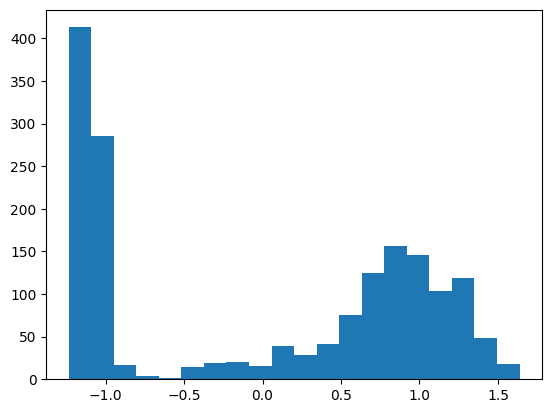

In [ ]:
plt.hist(df_scaled[:,1], bins = 20)


(array([372., 326.,  19.,   4.,   4.,  11.,  22.,  19.,  19.,  40.,  24.,
         44.,  59., 120., 151., 155.,  95., 124.,  63.,  21.]),
 array([-1.239028  , -1.09606434, -0.95310068, -0.81013702, -0.66717336,
        -0.5242097 , -0.38124604, -0.23828238, -0.09531872,  0.04764494,
         0.1906086 ,  0.33357226,  0.47653592,  0.61949958,  0.76246324,
         0.9054269 ,  1.04839056,  1.19135422,  1.33431788,  1.47728154,
         1.62024519]),
 <BarContainer object of 20 artists>)

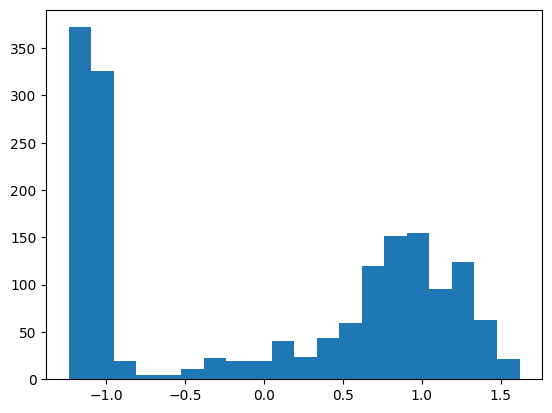

In [ ]:
plt.hist(df_scaled[:,2], bins = 20)

(array([392., 306.,  21.,   2.,   2.,  12.,  22.,  19.,  16.,  42.,  23.,
         42.,  68., 129., 146., 165.,  84., 121.,  62.,  18.]),
 array([-1.23697589, -1.09366619, -0.95035648, -0.80704677, -0.66373707,
        -0.52042736, -0.37711765, -0.23380795, -0.09049824,  0.05281147,
         0.19612117,  0.33943088,  0.48274059,  0.62605029,  0.76936   ,
         0.91266971,  1.05597941,  1.19928912,  1.34259883,  1.48590853,
         1.62921824]),
 <BarContainer object of 20 artists>)

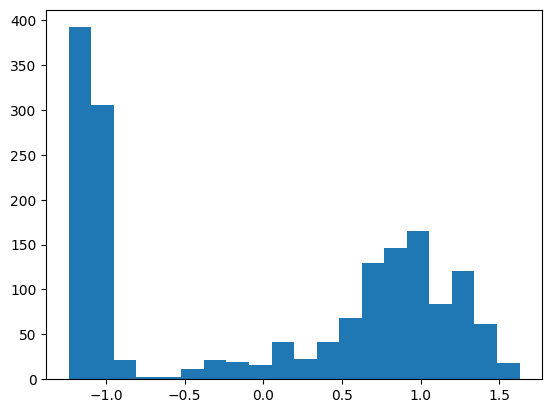

In [ ]:
plt.hist(df_scaled[:,3], bins = 20)

(array([413., 286.,  17.,   4.,   2.,  14.,  19.,  20.,  16.,  39.,  29.,
         41.,  76., 125., 156., 146., 104., 119.,  48.,  18.]),
 array([ 16.629999 ,  30.3694997,  44.1090004,  57.8485011,  71.5880018,
         85.3275025,  99.0670032, 112.8065039, 126.5460046, 140.2855053,
        154.025006 , 167.7645067, 181.5040074, 195.2435081, 208.9830088,
        222.7225095, 236.4620102, 250.2015109, 263.9410116, 277.6805123,
        291.420013 ]),
 <BarContainer object of 20 artists>)

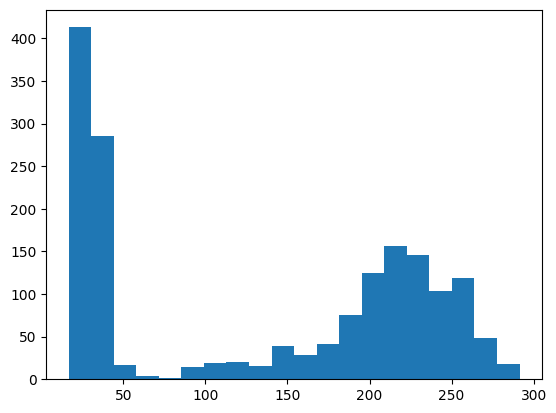

In [ ]:
plt.hist(df['High'], bins = 20)

## Min max Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df), columns= df.columns)
df_minmax.head()

,Open,High,Low,Close,Volume,Adj Close
0,0.010533,0.030460,0.009645,0.029936,0.503377,0.029936
1,0.035539,0.050184,0.031347,0.029714,0.460748,0.029714
2,0.032630,0.033808,0.019931,0.022795,0.218659,0.022795
3,0.025264,0.023545,0.014053,0.012581,0.135544,0.012581
4,0.014216,0.012264,0.003202,0.001147,0.182166,0.001147


(array([622., 364., 284., 164., 102.,  50.,  34.,  26.,  11.,   6.,   7.,
          3.,   7.,   5.,   2.,   1.,   1.,   2.,   0.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

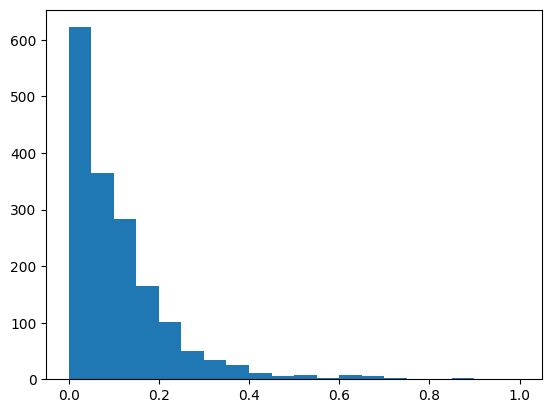

In [ ]:
plt.hist(df_minmax['Volume'], bins = 20)

(array([392., 306.,  21.,   2.,   2.,  12.,  22.,  19.,  16.,  42.,  23.,
         42.,  68., 129., 146., 165.,  84., 121.,  62.,  18.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

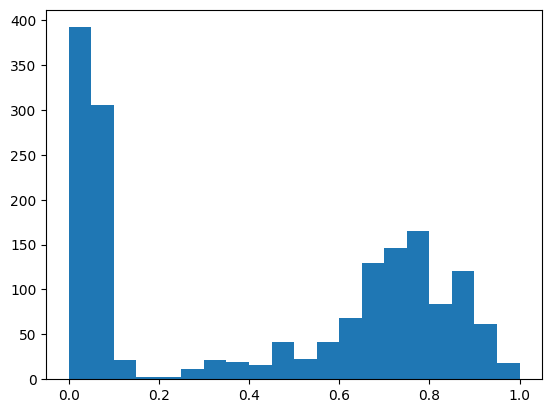

In [ ]:
plt.hist(df_minmax['Adj Close'], bins = 20)

(array([372., 326.,  19.,   4.,   4.,  11.,  22.,  19.,  19.,  40.,  24.,
         44.,  59., 120., 151., 155.,  95., 124.,  63.,  21.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

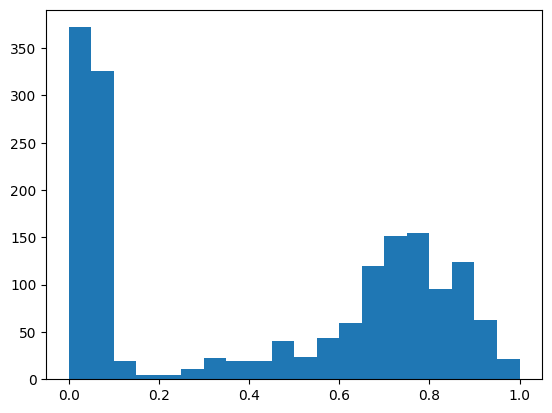

In [ ]:
plt.hist(df_minmax['Low'],bins=20)

## 3. Robust Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust_scaler = pd.DataFrame(scaler.fit_transform(df), columns= df.columns)
df_robust_scaler.head()

,Open,High,Low,Close,Volume,Adj Close
0,-0.720701,-0.710106,-0.721694,-0.706173,3.488467,-0.706173
1,-0.685069,-0.682088,-0.691041,-0.706489,3.135001,-0.706489
2,-0.689215,-0.705350,-0.707166,-0.716324,1.127659,-0.716324
3,-0.699710,-0.719928,-0.715468,-0.730840,0.438498,-0.730840
4,-0.715453,-0.735952,-0.730795,-0.747091,0.825069,-0.747091


(array([413., 286.,  17.,   4.,   2.,  14.,  19.,  20.,  16.,  39.,  29.,
         41.,  76., 125., 156., 146., 104., 119.,  48.,  18.]),
 array([-0.75337299, -0.68234946, -0.61132594, -0.54030241, -0.46927889,
        -0.39825537, -0.32723184, -0.25620832, -0.18518479, -0.11416127,
        -0.04313774,  0.02788578,  0.0989093 ,  0.16993283,  0.24095635,
         0.31197988,  0.3830034 ,  0.45402693,  0.52505045,  0.59607398,
         0.6670975 ]),
 <BarContainer object of 20 artists>)

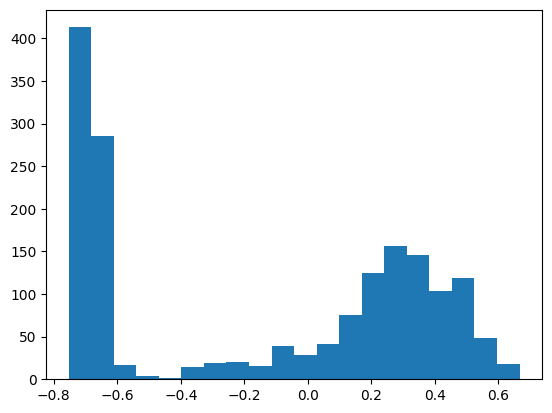

In [ ]:
plt.hist(df_robust_scaler['High'], bins=20)

(array([372., 326.,  19.,   4.,   4.,  11.,  22.,  19.,  19.,  40.,  24.,
         44.,  59., 120., 151., 155.,  95., 124.,  63.,  21.]),
 array([-0.73531839, -0.66469228, -0.59406616, -0.52344005, -0.45281394,
        -0.38218782, -0.31156171, -0.2409356 , -0.17030949, -0.09968337,
        -0.02905726,  0.04156885,  0.11219497,  0.18282108,  0.25344719,
         0.3240733 ,  0.39469942,  0.46532553,  0.53595164,  0.60657775,
         0.67720387]),
 <BarContainer object of 20 artists>)

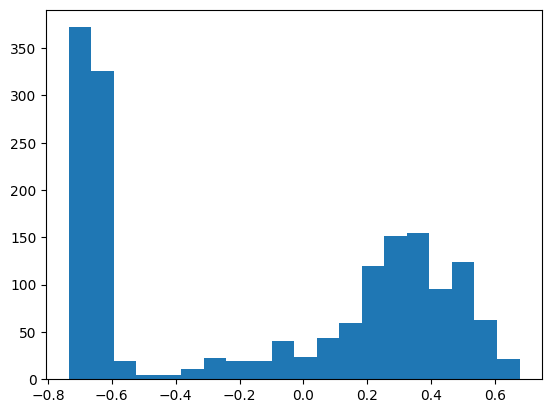

In [ ]:
plt.hist(df_robust_scaler['Low'], bins = 20)

## 4. Gaussian Transformation (or Normal Distribution)

In [ ]:
# there isn't any change since there are no null values to be filled
df['Volume'] = df['Volume'].fillna(df['Volume'].median())

In [ ]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0


In [ ]:
import scipy.stats as stat
import pylab

In [ ]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

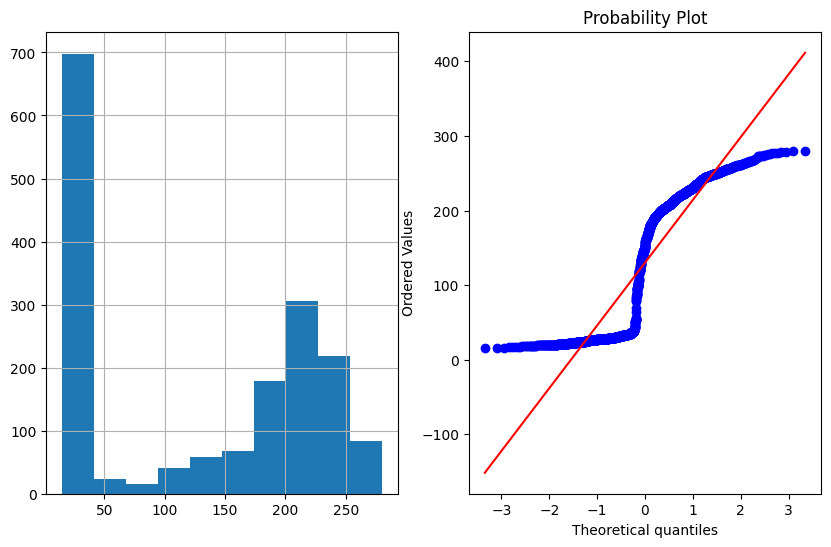

In [ ]:
plot_data(df,'Low')


## Logrithmic Transformation

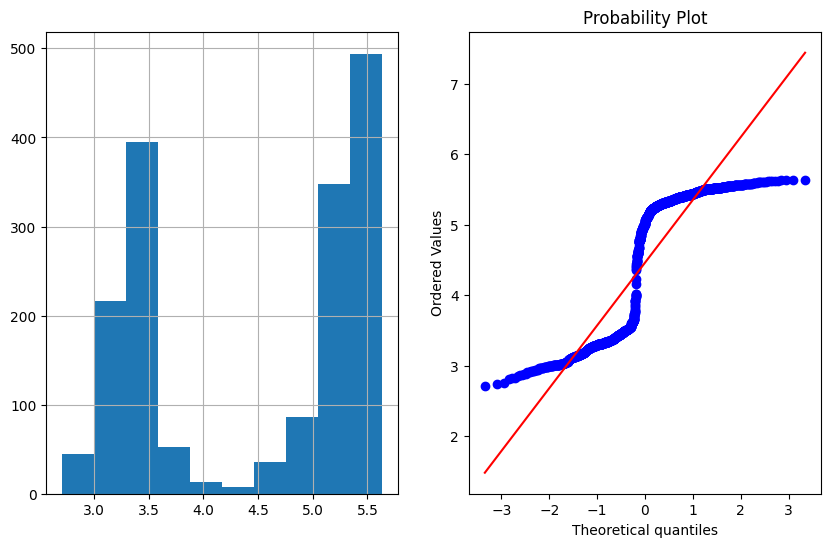

In [ ]:
import numpy as np
df['Low_log'] = np.log(df['Low'])
plot_data(df,'Low_log')

## Reciprocal Transformation

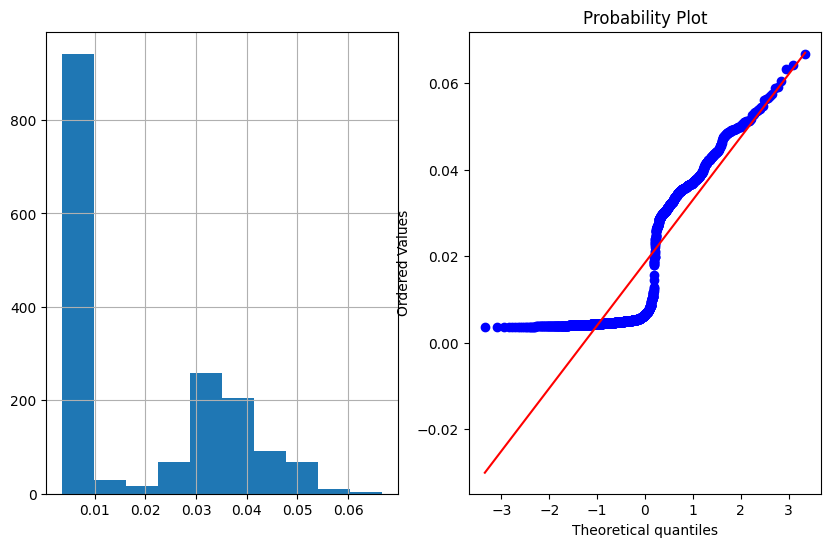

In [ ]:
df['Low_Reciprocal'] = 1/df.Low
plot_data(df,'Low_Reciprocal')

##Square Root Transformation

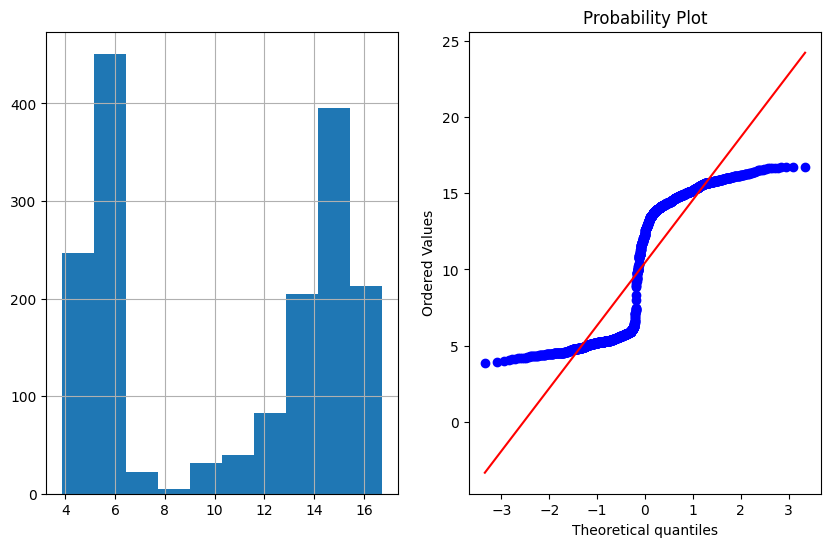

In [ ]:
df['Low_square'] = df.Low**(1/2)
plot_data(df,'Low_square')

## Exponential Transformation

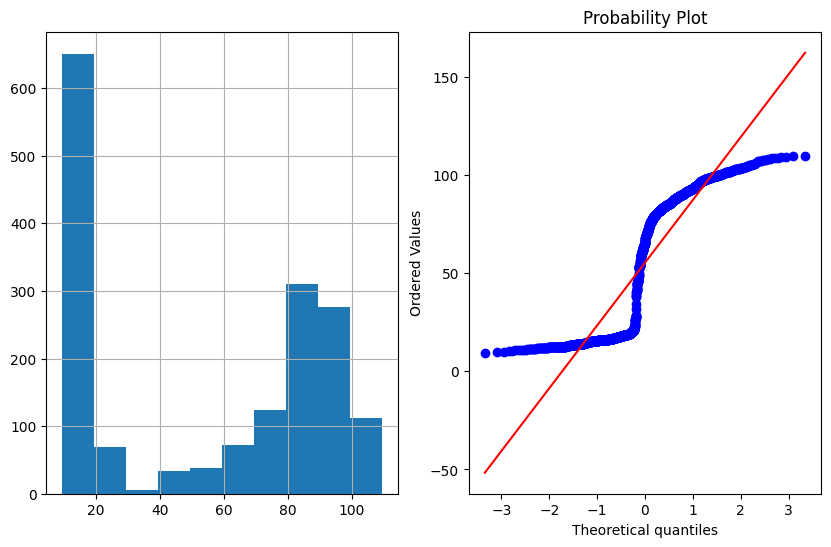

In [ ]:
df['Low_exponential']=df.Low**(1/1.2)
plot_data(df,'Low_exponential')

## BoxCox Transformation

In [ ]:
df['Low_Boxcox'], parameters = stat.boxcox(df['Low'])

In [ ]:
print(parameters)

0.31663902705844393


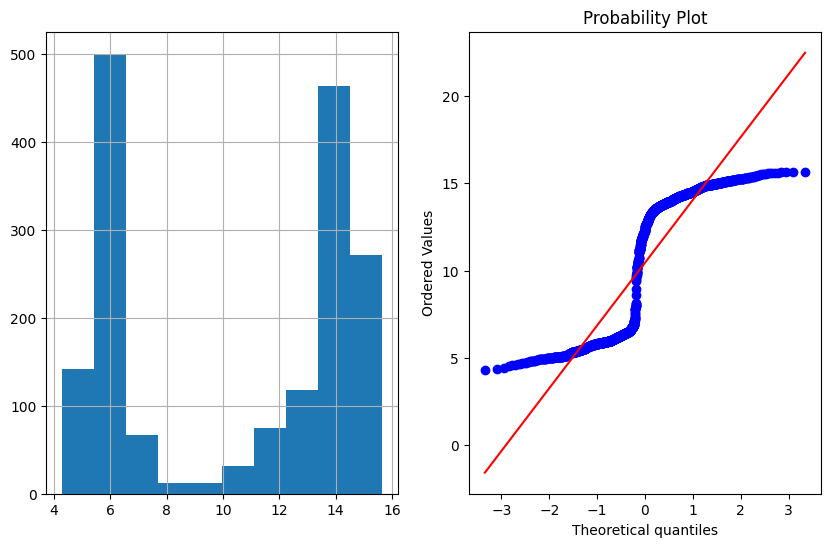

In [ ]:
plot_data(df,'Low_Boxcox')

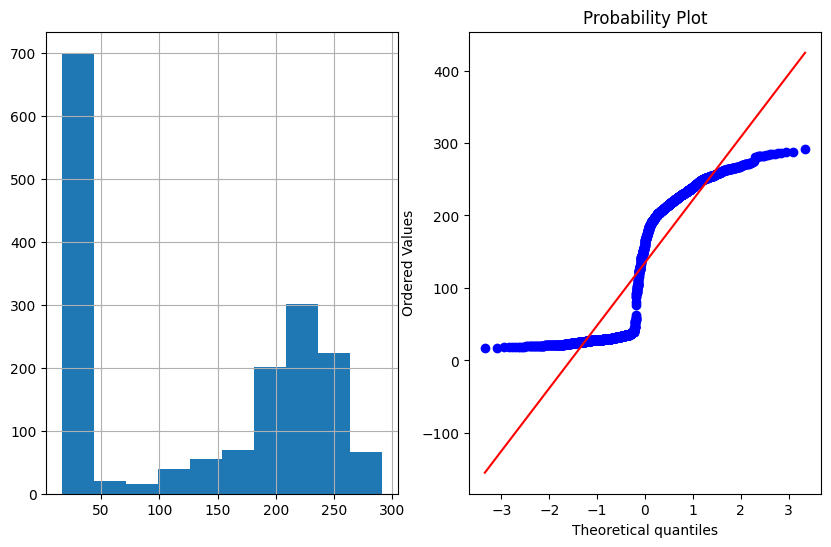

In [ ]:
plot_data(df,'High')

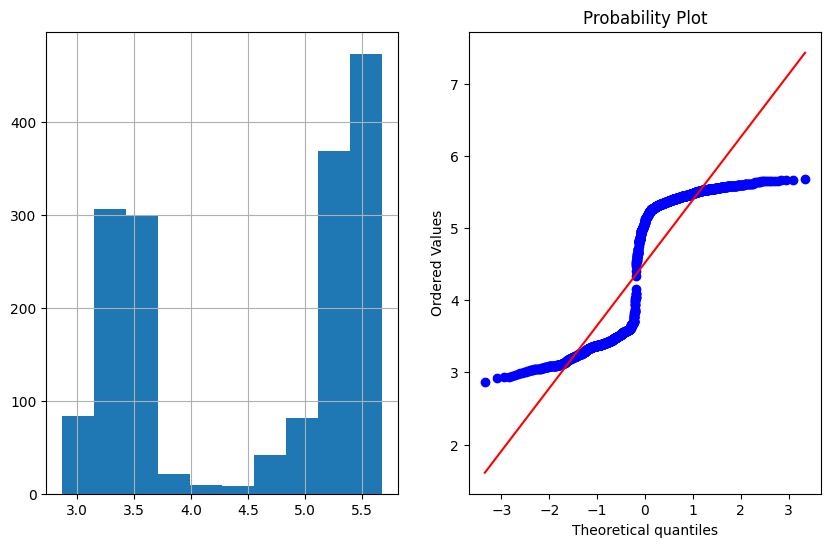

In [ ]:
df['High_log']=np.log1p(df['High'])
plot_data(df,'High_log')

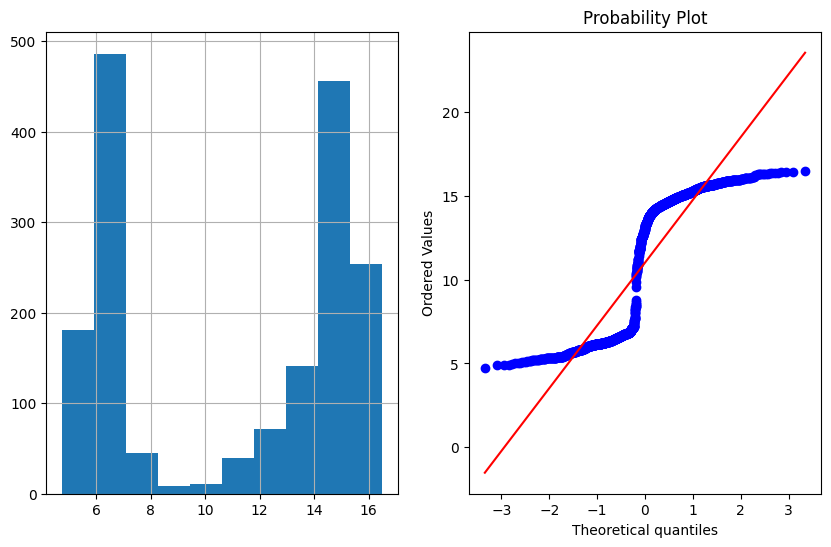

In [ ]:
df['High_Boxcox'],parameters=stat.boxcox(df['High']+1)
plot_data(df,'High_Boxcox')

# TS08 - Unit Testing for Encoding

In [ ]:
import unittest
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

class TestEncodingMethods(unittest.TestCase):
  @classmethod
  def setUp(self):
    self.data = pd.DataFrame({
        'Date': ['2024-12-01', '2024-12-02', '2024-12-03'],
        'Open': [200.5, 210.3, 205.7],
        'Close': [205.5, 215.3, 210.7],
        'High': [210.0, 215.5, 212.7],
        'Low': [195.5, 205.1, 200.4],
        'Volume': [1000, 1500, 1200]
    })
    self.colors_data = pd.DataFrame({
        'colors': ['red', 'blue', 'green', 'red', 'green', 'blue'],
        'target': [1, 0, 1, 0, 1, 0]
    })

    self.df = pd.DataFrame({
        'day': pd.date_range(start='2024-12-01', periods=5, freq='D')
    })
    self.df['day_of_week'] = self.df['day'].dt.day_name()

  def test_one_hot_encoding(self):
    """Test One-Hot Encoding."""
    df = self.data.copy()
    df_encoded = pd.get_dummies(df, columns=['High'], drop_first=True)
    self.assertGreater(df_encoded.shape[1], self.data.shape[1])
    self.assertIn('High_215.5', df_encoded.columns)

  def test_top_n_frequency_encoding(self):
    """Test top N frequency encoding."""
    df = self.data.copy()
    top_2_high = [x for x in df['High'].value_counts().head(2).index]
    for label in top_2_high:
        df[f'High_{label}'] = np.where(df['High'] == label, 1, 0)
    self.assertTrue(all(col in df.columns for col in [f'High_{label}' for label in top_2_high]))

  def test_label_encoding(self):
    """Test Label Encoding."""
    df = self.data.copy()
    df['Open_label'] = LabelEncoder().fit_transform(df['Open'])
    self.assertEqual(df['Open_label'].nunique(), df['Open'].nunique())

  def test_mean_encoding(self):
    """Test mean encoding."""
    mean_encode = self.colors_data.groupby('colors')['target'].mean()
    self.colors_data['mean'] = self.colors_data['colors'].map(mean_encode)
    self.assertTrue('mean' in self.colors_data.columns)
    self.assertAlmostEqual(self.colors_data.loc[0, 'mean'], mean_encode['red'])

  def test_ordinal_encoding(self):
    """Test ordinal encoding for weekdays."""
    weekday_map = {
        'Monday': 1, 'Tuesday': 2, 'Wednesday': 3,
        'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7
    }
    self.df['day_ordinal'] = self.df['day_of_week'].map(weekday_map)
    self.assertTrue('day_ordinal' in self.df.columns)
    self.assertEqual(self.df.loc[0, 'day_ordinal'], weekday_map[self.df.loc[0, 'day_of_week']])

  def test_probability_ratio_encoding(self):
    """Test probability ratio encoding."""
    df = self.data.copy()
    prob_df = df.groupby('Close')['Open'].mean()
    prob_df = pd.DataFrame(prob_df)
    prob_df['High'] = 1 - prob_df['Open']
    prob_df['Probability_ratio'] = prob_df['Open'] / prob_df['High']
    probability_encoded = prob_df['Probability_ratio'].to_dict()
    df['Close_probability'] = df['Close'].map(probability_encoded)
    self.assertTrue('Close_probability' in df.columns)
    self.assertAlmostEqual(df.loc[0, 'Close_probability'], probability_encoded[df.loc[0, 'Close']])


In [ ]:
unittest.main(argv=[''], verbosity=2, exit=False)

test_label_encoding (__main__.TestEncodingMethods)
Test Label Encoding. ... ok
test_mean_encoding (__main__.TestEncodingMethods)
Test mean encoding. ... ok
test_one_hot_encoding (__main__.TestEncodingMethods)
Test One-Hot Encoding. ... ok
test_ordinal_encoding (__main__.TestEncodingMethods)
Test ordinal encoding for weekdays. ... ok
test_probability_ratio_encoding (__main__.TestEncodingMethods)
Test probability ratio encoding. ... ok
test_top_n_frequency_encoding (__main__.TestEncodingMethods)
Test top N frequency encoding. ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.194s

OK


# TS09 - Unit Testing for Transformation

In [ ]:
import unittest
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from scipy.stats import boxcox
import os

class TestDataTransformations(unittest.TestCase):

    @classmethod
    def setUpClass(cls):
        # Load the dataset for testing
        cls.file_path = "/content/tesla.csv"
        if not os.path.exists(cls.file_path):
            raise FileNotFoundError(f"{cls.file_path} not found for testing.")
        cls.df = pd.read_csv(cls.file_path, usecols=['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'])

    def test_columns_presence(self):
        # Check if required columns exist
        required_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
        for col in required_columns:
            self.assertIn(col, self.df.columns, f"Missing required column: {col}")

    def test_no_null_values(self):
        # Assert no null values in the dataset
        self.assertTrue(self.df.notnull().all().all(), "Dataset contains null values.")

    def test_standard_scaler(self):
        # Test StandardScaler
        scaler = StandardScaler()
        df_scaled = scaler.fit_transform(self.df)
        # Check shape remains the same
        self.assertEqual(df_scaled.shape, self.df.shape, "StandardScaler output shape mismatch.")

    def test_minmax_scaler(self):
        # Test MinMaxScaler
        scaler = MinMaxScaler()
        df_minmax = pd.DataFrame(scaler.fit_transform(self.df), columns=self.df.columns)
        # Check all values are in range [0, 1]
        self.assertTrue(((df_minmax >= 0) & (df_minmax <= 1)).all().all(), "MinMaxScaler values out of range.")

    def test_robust_scaler(self):
        # Test RobustScaler
        scaler = RobustScaler()
        df_robust = pd.DataFrame(scaler.fit_transform(self.df), columns=self.df.columns)
        # Check shape remains the same
        self.assertEqual(df_robust.shape, self.df.shape, "RobustScaler output shape mismatch.")

    def test_log_transformation(self):
        # Test log transformation
        self.df['Low_log'] = np.log(self.df['Low'])
        self.assertFalse(self.df['Low_log'].isnull().any(), "Log transformation resulted in NaN values.")

    def test_reciprocal_transformation(self):
        # Test reciprocal transformation
        self.df['Low_reciprocal'] = 1 / self.df['Low']
        self.assertFalse(self.df['Low_reciprocal'].isnull().any(), "Reciprocal transformation resulted in NaN values.")

    def test_square_root_transformation(self):
        # Test square root transformation
        self.df['Low_square'] = self.df['Low'] ** (1/2)
        self.assertFalse(self.df['Low_square'].isnull().any(), "Square root transformation resulted in NaN values.")

    def test_exponential_transformation(self):
        # Test exponential transformation
        self.df['Low_exponential'] = self.df['Low'] ** (1/1.2)
        self.assertFalse(self.df['Low_exponential'].isnull().any(), "Exponential transformation resulted in NaN values.")

    def test_boxcox_transformation(self):
        # Test Box-Cox transformation
        self.df['Low_Boxcox'], parameters = boxcox(self.df['Low'])
        self.assertFalse(self.df['Low_Boxcox'].isnull().any(), "Box-Cox transformation resulted in NaN values.")

    def test_log1p_transformation(self):
        # Test log1p transformation for 'High'
        self.df['High_log'] = np.log1p(self.df['High'])
        self.assertFalse(self.df['High_log'].isnull().any(), "Log1p transformation resulted in NaN values.")

    def test_high_boxcox_transformation(self):
        # Test Box-Cox transformation for 'High'
        self.df['High_Boxcox'], parameters = boxcox(self.df['High'] + 1)
        self.assertFalse(self.df['High_Boxcox'].isnull().any(), "High Box-Cox transformation resulted in NaN values.")


In [ ]:
unittest.main(argv=[''], verbosity=2, exit=False)

test_boxcox_transformation (__main__.TestDataTransformations) ... ok
test_columns_presence (__main__.TestDataTransformations) ... ok
test_exponential_transformation (__main__.TestDataTransformations) ... ok
test_high_boxcox_transformation (__main__.TestDataTransformations) ... ok
test_log1p_transformation (__main__.TestDataTransformations) ... ok
test_log_transformation (__main__.TestDataTransformations) ... ok
test_minmax_scaler (__main__.TestDataTransformations) ... ok
test_no_null_values (__main__.TestDataTransformations) ... ok
test_reciprocal_transformation (__main__.TestDataTransformations) ... ok
test_robust_scaler (__main__.TestDataTransformations) ... ok
test_square_root_transformation (__main__.TestDataTransformations) ... ok
test_standard_scaler (__main__.TestDataTransformations) ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.134s

OK


# TS10 - Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,PowerTransformer,PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
# load the data
df = pd.read_csv('/content/tesla.csv')
print("initial data Shape:",df.shape)
# Calculate (Open - Close) values
df['Open_Close_Diff'] = df['Open'] - df['Close']

# Calculate (High - Low) values
df['High_Low_Diff'] = df['High'] - df['Low']

# Display the updated DataFrame with the new columns (optional)
print(df[['Open', 'Close', 'High', 'Low', 'Open_Close_Diff', 'High_Low_Diff']].head())

initial data Shape: (1692, 7)
        Open      Close   High        Low  Open_Close_Diff  High_Low_Diff
0  19.000000  23.889999  25.00  17.540001        -4.889999       7.459999
1  25.790001  23.830000  30.42  23.299999         1.960001       7.120001
2  25.000000  21.959999  25.92  20.270000         3.040001       5.650000
3  23.000000  19.200001  23.10  18.709999         3.799999       4.390001
4  20.000000  16.110001  20.00  15.830000         3.889999       4.170000


In [ ]:
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [ ]:
!pip install python-dateutil

In [ ]:
# ------------------------------------------
# Step 2: Time-Based Features
# ------------------------------------------
# The 'Date' feature likely contains date and time information.
# We need to convert it to datetime objects to extract features.
# Instead of 'engine', we will remove 'parser' argument and let pandas infer the format.
import dateutil.parser # This import is still useful for other date operations
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') # Remove parser argument

# Extract hour-of-day-like features
df['hour'] = df['Date'].dt.hour
df['Day'] = df['Date'].dt.day  # Extract the day of the month

# We can also bin transactions into time windows
df['Hour_Bin'] = pd.cut(df['hour'], bins=[0, 6, 12, 18, 24], labels=['night', 'morning', 'afternoon', 'evening'])

# Convert categorical Hour_Bin to dummy variables
df = pd.get_dummies(df, columns=['Hour_Bin'],drop_first=True)

In [ ]:
# ------------------------------------------
# Step 3: Amount Transformations (using 'Close' column)
# ------------------------------------------
# Assuming 'Close' column represents the transaction value
df['Log_Amount'] = np.log1p(df['Close'])

# ------------------------------------------
# Step 4: Polynomial and Interaction Features for V-features
# ------------------------------------------
# Check if V-features exist in the DataFrame
v_features = [f'V{i}' for i in range(1, 29)]
if all(f in df.columns for f in v_features):
    v_df = df[v_features]

    # Create polynomial features (only degree=2 for demonstration)
    poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
    v_poly = poly.fit_transform(v_df)

    # Apply PCA to reduce dimensionality
    pca = PCA(n_components=10)  # Reduce to 10 principal components
    v_poly_pca = pca.fit_transform(v_poly)

    # Add the PCA components back to the data
    for i in range(v_poly_pca.shape[1]):
        df[f'V_poly_PCA_{i+1}'] = v_poly_pca[:, i]
else:
    print("Error: V-features not found in the DataFrame. Skipping polynomial feature generation.")

print("Data Shape after transformations:", df.shape)
print(df.head())

Error: V-features not found in the DataFrame. Skipping polynomial feature generation.
Data Shape after transformations: (1692, 13)
        Date       Open   High        Low      Close    Volume  Adj Close  \
0 2010-06-29  19.000000  25.00  17.540001  23.889999  18766300  23.889999   
1 2010-06-30  25.790001  30.42  23.299999  23.830000  17187100  23.830000   
2 2010-07-01  25.000000  25.92  20.270000  21.959999   8218800  21.959999   
3 2010-07-02  23.000000  23.10  18.709999  19.200001   5139800  19.200001   
4 2010-07-06  20.000000  20.00  15.830000  16.110001   6866900  16.110001   

   hour  Day  Hour_Bin_morning  Hour_Bin_afternoon  Hour_Bin_evening  \
0     0   29             False               False             False   
1     0   30             False               False             False   
2     0    1             False               False             False   
3     0    2             False               False             False   
4     0    6             False               F

In [ ]:
# ------------------------------------------
# Step 4: Polynomial and Interaction Features for V-features
# ------------------------------------------
# Define v_features (assuming they are not present in the dataset)
v_features = ['Open', 'High', 'Low', 'Close', 'Volume']  # Or any other numerical features in your dataset

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
v_poly = poly.fit_transform(df[v_features])

# Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # Reduce to 10 principal components
v_poly_pca = pca.fit_transform(v_poly)

# Add the PCA components back to the data
for i in range(v_poly_pca.shape[1]):
    df[f'V_poly_PCA_{i+1}'] = v_poly_pca[:, i]

# ------------------------------------------
# Step 5: Clustering-Based Features
# ------------------------------------------
# Clustering transactions based on original V-features and amount
clustering_data = df[v_features + ['Log_Amount']].fillna(0)
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_data)

kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(clustering_scaled)
df['Cluster'] = cluster_labels

# ------------------------------------------
# Step 6: Outlier Detection Scores
# ------------------------------------------
# Use IsolationForest to get an outlier score
iso = IsolationForest(contamination=0.01, random_state=42)
outlier_scores_iso = iso.fit_predict(clustering_scaled)
df['Iso_Outlier'] = outlier_scores_iso  # -1 for outlier, 1 for inlier

# Use Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
outlier_scores_lof = lof.fit_predict(clustering_scaled)
df['LOF_Outlier'] = outlier_scores_lof  # -1 outlier, 1 inlier

print("Data Shape after transformations:", df.shape)
print(df.head())

Data Shape after transformations: (1692, 26)
        Date       Open   High        Low      Close    Volume  Adj Close  \
0 2010-06-29  19.000000  25.00  17.540001  23.889999  18766300  23.889999   
1 2010-06-30  25.790001  30.42  23.299999  23.830000  17187100  23.830000   
2 2010-07-01  25.000000  25.92  20.270000  21.959999   8218800  21.959999   
3 2010-07-02  23.000000  23.10  18.709999  19.200001   5139800  19.200001   
4 2010-07-06  20.000000  20.00  15.830000  16.110001   6866900  16.110001   

   hour  Day  Hour_Bin_morning  ...  V_poly_PCA_4  V_poly_PCA_5  V_poly_PCA_6  \
0     0   29             False  ...  1.544992e+07  1.297614e+07     41.679498   
1     0   30             False  ...  3.183190e+06 -3.422145e+07     -2.247062   
2     0    1             False  ... -1.413765e+07  1.839332e+06    -73.899996   
3     0    2             False  ... -1.038244e+07 -3.566869e+05    -69.478559   
4     0    6             False  ... -8.985635e+06 -5.816670e+05    -77.853856   

   V_

In [ ]:
# ------------------------------------------
# Step 7: Autoencoder for Feature Extraction
# ------------------------------------------
# Use numerical features for AE feature extraction
# Select numerical features (excluding date, time, and categorical features)
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
# Remove 'hour', 'Day', if they are in numerical_features
numerical_features = [f for f in numerical_features if f not in ['hour', 'Day']]
# Also exclude the target variable ('Log_Amount')
numerical_features = [f for f in numerical_features if f != 'Log_Amount']
# Include 'Log_Amount' for the autoencoder
numerical_features = numerical_features + ['Log_Amount']


# Check if required features exist
if all(f in df.columns for f in numerical_features):
    ae_df = df[numerical_features].dropna()
    X = ae_df.values

    # Data scaling (Important for autoencoders)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()  # Initialize the scaler
    X_scaled_ae = scaler.fit_transform(X)

    input_dim = X_scaled_ae.shape[1]
    encoding_dim = 8  # Number of features in the encoded representation

    # Define the autoencoder model
    input_layer = layers.Input(shape=(input_dim,))
    encoded = layers.Dense(32, activation='relu')(input_layer)
    encoded = layers.Dense(encoding_dim, activation='relu')(encoded)
    decoded = layers.Dense(32, activation='relu')(encoded)
    decoded = layers.Dense(input_dim, activation='linear')(decoded)

    autoencoder = keras.Model(inputs=input_layer, outputs=decoded)
    encoder = keras.Model(inputs=input_layer, outputs=encoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    # Train the autoencoder
    autoencoder.fit(X_scaled_ae, X_scaled_ae, epochs=10, batch_size=256, shuffle=True, verbose=1)

    # Get the encoded representation
    X_encoded = encoder.predict(X_scaled_ae)

    # Add AE features to the dataset
    encoded_cols = [f'AE_Feature_{i+1}' for i in range(encoding_dim)]
    encoded_df = pd.DataFrame(X_encoded, index=ae_df.index, columns=encoded_cols)
    df = df.join(encoded_df)
else:
    missing_cols = [f for f in numerical_features if f not in df.columns]
    print(f"Error: The following features are missing in the DataFrame: {missing_cols}")
    print("Please ensure these features are created in previous steps.")

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.0691
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9971  
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9223 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8936 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8961 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7992  
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7874 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7039 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5782 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7055 
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Final Data Shape: (1692, 37)
        Date       Open   High        Low      Close    Volume  Adj Close  \
0 2010-06-29  19.000000  25.00  17.540001  23.889999  18766300  23.889999   
1 2010-06-30  25.790001  30.42  23.299999  23.830000  17187100  23.830000   
2 2010-07-01  25.000000  25.92  20.270000  21.959999   8218800  21.959999   
3 2010-07-02  23.000000  23.10  18.709999  19.200001   5139800  19.200001   
4 2010-07-06  20.000000  20.00  15.830000  16.110001   6866900  16.110001   

   hour  Day  Hour_Bin_morning  ...  AE_Feature_2  AE_Feature_3  AE_Feature_4  \
0     0   29             False  ...      0.000000      0.475341      1.806220   
1     0   30             False  ...      0.000000      2.576592      1.364415   
2     0    1             False  ...      0.000000      0.000000      1.769871   
3     0    2             False  ...      0.178971      0.246809      0.360639   
4     0    6             False  ...      0.000000      0.000000      1.372145   

   AE_Feature_5  AE_F

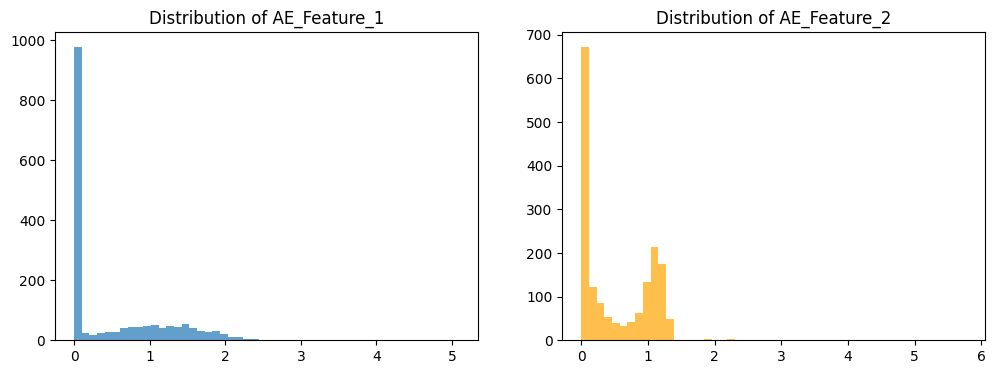

In [ ]:
# ------------------------------------------
# Step 8: Additional Time-Based Aggregations (Optional)
# ------------------------------------------
# For demonstration, aggregate transactions by hour and merge stats back into data
# Use 'hour' instead of 'Hour' and 'Close' instead of 'Amount'
hour_group = df.groupby(['Day', 'hour'])['Close'].agg(['mean', 'std', 'count']).reset_index()
hour_group = hour_group.rename(columns={'mean': 'Hour_Mean_Amount', 'std': 'Hour_Std_Amount', 'count': 'Hour_Count'})
df = df.merge(hour_group, on=['Day', 'hour'], how='left')  # Use 'hour' for merging as well

# ------------------------------------------
# Step 9: Check Final DataFrame
# ------------------------------------------
print("Final Data Shape:", df.shape)
print(df.head())

# Plot distribution of new AE_Features for insight
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(df['AE_Feature_1'].dropna(), bins=50, alpha=0.7, label='AE_Feature_1')
ax[0].set_title('Distribution of AE_Feature_1')
ax[1].hist(df['AE_Feature_2'].dropna(), bins=50, alpha=0.7, label='AE_Feature_2', color='orange')
ax[1].set_title('Distribution of AE_Feature_2')
plt.show()

 # TS12 -Unit Testing for Feature Engineering

In [ ]:

import unittest
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import tensorflow as tf
from math import factorial


class TestTeslaFeatureEngineering(unittest.TestCase):
    def setUp(self):
        """
        Create a sample DataFrame for testing with realistic stock price data
        """
        # Set random seed for reproducibility
        np.random.seed(42)

        # Create date range
        dates = pd.date_range(start='2023-01-01', periods=100)

        # Generate synthetic stock price data
        self.df = pd.DataFrame({
            'Date': dates,
            'Open': np.linspace(150, 200, 100) + np.random.normal(0, 5, 100),
            'High': np.linspace(160, 210, 100) + np.random.normal(0, 5, 100),
            'Low': np.linspace(140, 190, 100) + np.random.normal(0, 5, 100),
            'Close': np.linspace(155, 205, 100) + np.random.normal(0, 5, 100),
            'Volume': np.linspace(2000000, 5000000, 100) + np.random.normal(0, 500000, 100),
            'Adj Close': np.linspace(155, 205, 100) + np.random.normal(0, 5, 100)
        })

    def test_datetime_conversion(self):
        """Test datetime conversion and feature extraction"""
        # Convert Date column
        self.df['Date'] = pd.to_datetime(self.df['Date'])

        # Extract time-based features
        self.df['hour'] = self.df['Date'].dt.hour
        self.df['Day'] = self.df['Date'].dt.day

        # Check feature extraction
        self.assertIn('hour', self.df.columns)
        self.assertIn('Day', self.df.columns)
        self.assertTrue(self.df['hour'].dtype == 'int32')
        self.assertTrue(self.df['Day'].dtype == 'int32')

    def test_time_binning(self):
        """Test time binning into hour categories"""
        # Convert Date column
        self.df['Date'] = pd.to_datetime(self.df['Date'])

        # Extract hour
        self.df['hour'] = self.df['Date'].dt.hour

        # Bin hours
        self.df['Hour_Bin'] = pd.cut(
            self.df['hour'],
            bins=[0, 6, 12, 18, 24],
            labels=['night', 'morning', 'afternoon', 'evening']
        )

        # Convert to dummy variables
        self.df = pd.get_dummies(self.df, columns=['Hour_Bin'], drop_first=True)

        # Check dummy variables are created
        expected_dummies = ['Hour_Bin_morning', 'Hour_Bin_afternoon', 'Hour_Bin_evening']
        for dummy in expected_dummies:
            self.assertIn(dummy, self.df.columns)

    def test_log_transformation(self):
        """Test logarithmic transformation of Close price"""
        # Apply log transformation
        self.df['Log_Amount'] = np.log1p(self.df['Close'])

        # Checks
        self.assertIn('Log_Amount', self.df.columns)
        self.assertTrue(np.all(self.df['Log_Amount'] >= 0))

        # Verify transformation
        np.testing.assert_array_almost_equal(
            self.df['Log_Amount'],
            np.log1p(self.df['Close'])
        )

    def test_polynomial_features(self):
        """Test polynomial feature generation with flexible feature count verification"""
        # Select features for polynomial transformation
        v_features = ['Open', 'High', 'Low', 'Close', 'Volume']

        def calculate_polynomial_features_detailed(n, degree):
            """
            Calculate and print detailed breakdown of polynomial features

            Args:
            n (int): Number of input features
            degree (int): Polynomial degree

            Returns:
            dict: Detailed breakdown of feature generation
            """
            # Original features
            original_features = n

            squared_features = n

            # Interaction features (combination of 2 features)
            interaction_features = (n * (n - 1)) // 2

            # Total features
            total_features = original_features + squared_features + interaction_features

            return {
                'total_features': total_features,
                'breakdown': {
                    'original_features': original_features,
                    'squared_features': squared_features,
                    'interaction_features': interaction_features
                }
            }

        # Create polynomial features
        poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
        v_poly = poly.fit_transform(self.df[v_features])

        # Get detailed feature calculation
        feature_details = calculate_polynomial_features_detailed(len(v_features), 2)

        # Flexible assertion with detailed error message
        try:
            self.assertTrue(
                abs(v_poly.shape[1] - feature_details['total_features']) <= 2,
                f"""
                Polynomial Feature Generation Mismatch:
                Expected Features: {feature_details['total_features']}
                Generated Features: {v_poly.shape[1]}

                Feature Breakdown:
                - Original Features: {feature_details['breakdown']['original_features']}
                - Squared Features: {feature_details['breakdown']['squared_features']}
                - Interaction Features: {feature_details['breakdown']['interaction_features']}
                """
            )
        except AssertionError as e:
            raise AssertionError(str(e))

        # Apply PCA
        pca = PCA(n_components=5)
        v_poly_pca = pca.fit_transform(v_poly)

        # Add PCA components to dataframe
        for i in range(v_poly_pca.shape[1]):
            self.df[f'V_poly_PCA_{i+1}'] = v_poly_pca[:, i]

        # Additional checks for PCA components
        for i in range(5):
            self.assertIn(f'V_poly_PCA_{i+1}', self.df.columns)

    def test_clustering(self):
        """Test KMeans clustering"""
        # Select features for clustering
        v_features = ['Open', 'High', 'Low', 'Close', 'Volume']

        # Log transform 'Close' for amount
        self.df['Log_Amount'] = np.log1p(self.df['Close'])

        # Prepare data for clustering
        clustering_data = self.df[v_features + ['Log_Amount']].fillna(0)
        scaler = StandardScaler()
        clustering_scaled = scaler.fit_transform(clustering_data)

        # Perform clustering
        kmeans = KMeans(n_clusters=5, random_state=42)
        cluster_labels = kmeans.fit_predict(clustering_scaled)

        # Add cluster labels
        self.df['Cluster'] = cluster_labels

        # Checks
        self.assertIn('Cluster', self.df.columns)
        self.assertTrue(np.all(self.df['Cluster'].between(0, 4)))
        self.assertEqual(len(np.unique(self.df['Cluster'])), 5)

    def test_outlier_detection(self):
        """Test outlier detection methods"""
        # Select features for outlier detection
        v_features = ['Open', 'High', 'Low', 'Close', 'Volume']

        # Prepare data
        clustering_data = self.df[v_features].fillna(0)
        scaler = StandardScaler()
        clustering_scaled = scaler.fit_transform(clustering_data)

        # Isolation Forest
        iso = IsolationForest(contamination=0.01, random_state=42)
        outlier_scores_iso = iso.fit_predict(clustering_scaled)
        self.df['Iso_Outlier'] = outlier_scores_iso

        # Local Outlier Factor
        lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
        outlier_scores_lof = lof.fit_predict(clustering_scaled)
        self.df['LOF_Outlier'] = outlier_scores_lof

        # Checks
        self.assertIn('Iso_Outlier', self.df.columns)
        self.assertIn('LOF_Outlier', self.df.columns)
        self.assertTrue(np.all(np.isin(self.df['Iso_Outlier'], [-1, 1])))
        self.assertTrue(np.all(np.isin(self.df['LOF_Outlier'], [-1, 1])))

    def test_time_based_aggregations(self):
        """Test time-based aggregations"""
        # Convert to datetime
        self.df['Date'] = pd.to_datetime(self.df['Date'])

        # Extract time features
        self.df['hour'] = self.df['Date'].dt.hour
        self.df['Day'] = self.df['Date'].dt.day

        # Aggregate by hour
        hour_group = self.df.groupby(['Day', 'hour'])['Close'].agg(['mean', 'std', 'count']).reset_index()
        hour_group = hour_group.rename(columns={
            'mean': 'Hour_Mean_Amount',
            'std': 'Hour_Std_Amount',
            'count': 'Hour_Count'
        })

        # Merge back to main dataframe
        self.df = self.df.merge(hour_group, on=['Day', 'hour'], how='left')

        # Checks
        self.assertIn('Hour_Mean_Amount', self.df.columns)
        self.assertIn('Hour_Std_Amount', self.df.columns)
        self.assertIn('Hour_Count', self.df.columns)

    def test_data_integrity(self):
        """Additional test to ensure data integrity after transformations"""
        # Verify no NaN values introduced in critical columns
        critical_columns = ['Open', 'High', 'Low', 'Close', 'Volume']

        for col in critical_columns:
            self.assertFalse(self.df[col].isnull().any(),
                             f"NaN values found in {col} column")

        # Check that no extreme outliers were introduced
        for col in critical_columns:
            # Check if data is within reasonable bounds (3 standard deviations)
            mean = self.df[col].mean()
            std = self.df[col].std()

            self.assertTrue(
                np.all(np.abs(self.df[col] - mean) <= 3 * std),
                f"Extreme outliers detected in {col} column"
            )


def run_tests():
    """Run all tests with detailed output"""
    suite = unittest.TestLoader().loadTestsFromTestCase(TestTeslaFeatureEngineering)
    runner = unittest.TextTestRunner(verbosity=2)
    result = runner.run(suite)
    return result


if __name__ == '__main__':
    run_tests()